In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv("/content/drive/MyDrive/Crime_Incidents_in_2024.csv")

df.head()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,399581.5100,129706.9200,5094764,2024/09/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,100 - 146 BLOCK OF WAYNE PLACE SE,399581.510000,129706.920000,...,009803 3,9803.0,Precinct 124,38.835154,-77.004820,NaN,2005/07/18 08:40:00+00,2024/09/30 13:30:00+00,629515303,NaN
1,403992.4500,135998.8200,24001130,2024/01/03 07:08:57+00,MIDNIGHT,OTHERS,THEFT/OTHER,100 - 222 BLOCK OF 35TH STREET NE,403992.450000,135998.820000,...,009603 3,9603.0,Precinct 102,38.891825,-76.953980,NaN,2024/01/03 03:10:00+00,2024/01/03 04:37:00+00,629765887,NaN
2,405841.8415,134205.6072,24002349,2024/01/05 18:59:05+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4600 - 4699 BLOCK OF EASY PLACE SE,405841.841539,134205.607162,...,007707 2,7707.0,Precinct 106,38.875661,-76.932677,NaN,2024/01/05 16:13:00+00,2024/01/05 16:54:00+00,629765888,NaN
3,398491.1900,138718.1700,24002586,2024/01/06 01:07:04+00,EVENING,GUN,ROBBERY,1900 - 1925 BLOCK OF 4TH STREET NW,398491.190000,138718.170000,...,003400 1,3400.0,Precinct 20,38.916330,-77.017398,NaN,2024/01/05 23:49:00+00,2024/01/05 23:49:00+00,629765889,NaN
4,400121.3800,137998.9000,24002733,2024/01/06 06:59:30+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 4TH STREET NE,400121.380000,137998.900000,...,008803 2,8803.0,Precinct 76,38.909852,-76.998601,NaN,2024/01/06 06:33:00+00,2024/01/06 07:00:00+00,629765890,NaN


In [ ]:
df.sample(10)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
24341,397823.7800,141376.7300,24084994,2024/06/05 11:44:48+00,DAY,OTHERS,THEFT/OTHER,4000 - 4099 BLOCK OF GEORGIA AVENUE NW,397823.780000,141376.730000,...,002503 1,2503.0,Precinct 47,38.940277,-77.025102,NaN,2024/06/05 10:32:00+00,2024/06/05 11:21:00+00,630043429,NaN
13236,392978.1800,142424.1500,24123892,2024/08/13 17:57:20+00,DAY,OTHERS,THEFT/OTHER,4100 - 4151 BLOCK OF BRANDYWINE STREET NW,392978.180000,142424.150000,...,001004 2,1004.0,Precinct 31,38.949687,-77.081005,NaN,2024/08/12 22:00:00+00,2024/08/13 04:00:00+00,629838465,NaN
3970,393039.4300,142375.1600,24168666,2024/10/30 18:48:57+00,DAY,OTHERS,THEFT/OTHER,4530 - 4599 BLOCK OF WISCONSIN AVENUE NW,393039.430000,142375.160000,...,001100 4,1100.0,Precinct 32,38.949247,-77.080298,NaN,2024/10/30 17:51:00+00,2024/10/30 17:55:00+00,629809669,NaN
23495,401135.6594,134507.3445,24118550,2024/08/03 01:13:36+00,EVENING,OTHERS,THEFT/OTHER,1300 - 1399 BLOCK OF K STREET SE,401135.659359,134507.344474,...,007100 1,7100.0,Precinct 91,38.878398,-76.986912,NaN,2024/08/02 23:47:00+00,2024/08/03 01:06:00+00,630031701,NaN
1875,396738.2100,140714.8500,24421965,2024/05/30 21:01:34+00,EVENING,OTHERS,THEFT/OTHER,3400 - 3430 BLOCK OF BROWN STREET NW,396738.210000,140714.850000,...,002703 1,2703.0,Precinct 40,38.934312,-77.037621,NaN,2024/05/25 09:25:00+00,2024/05/25 09:26:00+00,629803829,NaN
10240,398315.7200,137185.2500,24108893,2024/07/16 20:48:56+00,EVENING,OTHERS,THEFT/OTHER,500 - 599 BLOCK OF K STREET NW,398315.720000,137185.250000,...,004702 4,4702.0,Precinct 1,38.902520,-77.019417,MOUNT VERNON TRIANGLE CID,2024/07/16 15:27:00+00,2024/07/16 15:35:00+00,629825955,NaN
21966,400846.5299,135214.7351,24085838,2024/06/06 18:02:04+00,DAY,OTHERS,THEFT F/AUTO,300 - 399 BLOCK OF 12TH STREET SE,400846.529855,135214.735099,...,006900 1,6900.0,Precinct 91,38.884770,-76.990243,NaN,2024/06/06 13:50:00+00,2024/06/06 16:00:00+00,630024097,NaN
22356,399622.2700,134352.6200,24040258,2024/03/17 05:18:41+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,1100 - 1199 BLOCK OF NEW JERSEY AVENUE SE,399622.270000,134352.620000,...,007202 1,7202.0,Precinct 131,38.877004,-77.004353,CAPITOL RIVERFRONT,2024/03/17 02:12:00+00,2024/03/17 03:49:00+00,630025785,NaN
11851,394449.1500,137479.0600,24170504,2024/11/02 19:51:14+00,EVENING,OTHERS,THEFT/OTHER,3200 - 3275 BLOCK OF M STREET NW,394449.150000,137479.060000,...,000202 3,202.0,Precinct 6,38.905151,-77.063996,GEORGETOWN,2024/11/02 17:34:00+00,NaN,629833865,NaN
11686,399420.7993,128792.0732,24163239,2024/10/21 12:16:25+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4300 - 4399 BLOCK OF HALLEY TERRACE SE,399420.799293,128792.073237,...,009810 2,9810.0,Precinct 126,38.826912,-77.006670,NaN,2024/10/21 11:14:00+00,2024/10/21 12:16:00+00,629833440,NaN


In [ ]:
df.nunique()

,0
X,6733
Y,6758
CCN,26332
REPORT_DAT,26287
SHIFT,3
METHOD,3
OFFENSE,9
BLOCK,6837
XBLOCK,6760
YBLOCK,6780


In [ ]:
print(df["METHOD"].unique())

['GUN' 'OTHERS' 'KNIFE']


In [ ]:
df.drop(columns =["OCTO_RECORD_ID"] , inplace=True)
df

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
0,399581.5100,129706.9200,5094764,2024/09/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,100 - 146 BLOCK OF WAYNE PLACE SE,399581.510000,129706.920000,...,Cluster 39,009803 3,9803.0,Precinct 124,38.835154,-77.004820,NaN,2005/07/18 08:40:00+00,2024/09/30 13:30:00+00,629515303
1,403992.4500,135998.8200,24001130,2024/01/03 07:08:57+00,MIDNIGHT,OTHERS,THEFT/OTHER,100 - 222 BLOCK OF 35TH STREET NE,403992.450000,135998.820000,...,Cluster 32,009603 3,9603.0,Precinct 102,38.891825,-76.953980,NaN,2024/01/03 03:10:00+00,2024/01/03 04:37:00+00,629765887
2,405841.8415,134205.6072,24002349,2024/01/05 18:59:05+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4600 - 4699 BLOCK OF EASY PLACE SE,405841.841539,134205.607162,...,Cluster 33,007707 2,7707.0,Precinct 106,38.875661,-76.932677,NaN,2024/01/05 16:13:00+00,2024/01/05 16:54:00+00,629765888
3,398491.1900,138718.1700,24002586,2024/01/06 01:07:04+00,EVENING,GUN,ROBBERY,1900 - 1925 BLOCK OF 4TH STREET NW,398491.190000,138718.170000,...,Cluster 3,003400 1,3400.0,Precinct 20,38.916330,-77.017398,NaN,2024/01/05 23:49:00+00,2024/01/05 23:49:00+00,629765889
4,400121.3800,137998.9000,24002733,2024/01/06 06:59:30+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 4TH STREET NE,400121.380000,137998.900000,...,Cluster 23,008803 2,8803.0,Precinct 76,38.909852,-76.998601,NaN,2024/01/06 06:33:00+00,2024/01/06 07:00:00+00,629765890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26334,399978.8000,137790.8200,24031916,2024/03/01 20:26:50+00,EVENING,OTHERS,THEFT/OTHER,300 - 399 BLOCK OF MORSE STREET NE,399978.800000,137790.820000,...,Cluster 23,008803 2,8803.0,Precinct 76,38.907977,-77.000244,NaN,2024/02/28 19:06:00+00,2024/02/28 20:08:00+00,630054026
26335,396378.9500,139491.3400,24047512,2024/03/30 10:35:26+00,MIDNIGHT,OTHERS,BURGLARY,1761 - 1780 BLOCK OF COLUMBIA ROAD NW,396378.950000,139491.340000,...,Cluster 1,003901 2,3901.0,Precinct 35,38.923288,-77.041758,ADAMS MORGAN,2024/03/30 09:07:00+00,2024/03/30 09:34:00+00,630054061
26336,402769.4500,139567.0500,24051570,2024/04/07 07:08:48+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2600 - 2699 BLOCK OF 28TH STREET NE,402769.450000,139567.050000,...,Cluster 22,011100 1,11100.0,Precinct 71,38.923974,-76.968063,NaN,2024/04/07 00:56:00+00,2024/04/07 02:52:00+00,630054062
26337,400541.5000,139301.4000,24051785,2024/04/09 18:24:02+00,DAY,OTHERS,MOTOR VEHICLE THEFT,2300 - 2499 BLOCK OF WASHINGTON PLACE NE,400541.500000,139301.400000,...,Cluster 22,009102 4,9102.0,Precinct 72,38.921585,-76.993756,NaN,2024/04/07 14:35:00+00,2024/04/07 16:14:00+00,630054063


In [ ]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26339 entries, 0 to 26338
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     26339 non-null  float64
 1   Y                     26339 non-null  float64
 2   CCN                   26339 non-null  int64  
 3   REPORT_DAT            26339 non-null  object 
 4   SHIFT                 26339 non-null  object 
 5   METHOD                26339 non-null  object 
 6   OFFENSE               26339 non-null  object 
 7   BLOCK                 26339 non-null  object 
 8   XBLOCK                26339 non-null  float64
 9   YBLOCK                26339 non-null  float64
 10  WARD                  26335 non-null  float64
 11  ANC                   26335 non-null  object 
 12  DISTRICT              25605 non-null  float64
 13  PSA                   25886 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  26335 non-null  object 
 15  B

In [ ]:
print("\nSummary Statistics:")
print(df.describe)


Summary Statistics:
<bound method NDFrame.describe of                  X            Y       CCN              REPORT_DAT     SHIFT  \
0      399581.5100  129706.9200   5094764  2024/09/30 04:00:00+00  MIDNIGHT   
1      403992.4500  135998.8200  24001130  2024/01/03 07:08:57+00  MIDNIGHT   
2      405841.8415  134205.6072  24002349  2024/01/05 18:59:05+00       DAY   
3      398491.1900  138718.1700  24002586  2024/01/06 01:07:04+00   EVENING   
4      400121.3800  137998.9000  24002733  2024/01/06 06:59:30+00  MIDNIGHT   
...            ...          ...       ...                     ...       ...   
26334  399978.8000  137790.8200  24031916  2024/03/01 20:26:50+00   EVENING   
26335  396378.9500  139491.3400  24047512  2024/03/30 10:35:26+00  MIDNIGHT   
26336  402769.4500  139567.0500  24051570  2024/04/07 07:08:48+00  MIDNIGHT   
26337  400541.5000  139301.4000  24051785  2024/04/09 18:24:02+00       DAY   
26338  393661.5300  139255.9900  24149315  2024/09/27 03:05:20+00  MIDNIGHT 

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
X                           0
Y                           0
CCN                         0
REPORT_DAT                  0
SHIFT                       0
METHOD                      0
OFFENSE                     0
BLOCK                       0
XBLOCK                      0
YBLOCK                      0
WARD                        4
ANC                         4
DISTRICT                  734
PSA                       453
NEIGHBORHOOD_CLUSTER        4
BLOCK_GROUP                13
CENSUS_TRACT               13
VOTING_PRECINCT             4
LATITUDE                    0
LONGITUDE                   0
BID                     21422
START_DATE                  5
END_DATE                 1892
OBJECTID                    0
dtype: int64


In [ ]:
# Calculate percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display the percentages in a readable format
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
X                        0.000000
Y                        0.000000
CCN                      0.000000
REPORT_DAT               0.000000
SHIFT                    0.000000
METHOD                   0.000000
OFFENSE                  0.000000
BLOCK                    0.000000
XBLOCK                   0.000000
YBLOCK                   0.000000
WARD                     0.015187
ANC                      0.015187
DISTRICT                 2.786742
PSA                      1.719883
NEIGHBORHOOD_CLUSTER     0.015187
BLOCK_GROUP              0.049356
CENSUS_TRACT             0.049356
VOTING_PRECINCT          0.015187
LATITUDE                 0.000000
LONGITUDE                0.000000
BID                     81.331865
START_DATE               0.018983
END_DATE                 7.183264
OBJECTID                 0.000000
dtype: float64


We can see that the column "BID" has 81 percent missing vales, so it holds very little signifance towards our data analysis. Hence, we can drop this feature.

In [ ]:
df2 = df.drop(columns=['BID'])

print("The 'BID' feature has been removed.")

The 'BID' feature has been removed.


In [ ]:
df2

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,START_DATE,END_DATE,OBJECTID
0,399581.5100,129706.9200,5094764,2024/09/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,100 - 146 BLOCK OF WAYNE PLACE SE,399581.510000,129706.920000,...,707.0,Cluster 39,009803 3,9803.0,Precinct 124,38.835154,-77.004820,2005/07/18 08:40:00+00,2024/09/30 13:30:00+00,629515303
1,403992.4500,135998.8200,24001130,2024/01/03 07:08:57+00,MIDNIGHT,OTHERS,THEFT/OTHER,100 - 222 BLOCK OF 35TH STREET NE,403992.450000,135998.820000,...,603.0,Cluster 32,009603 3,9603.0,Precinct 102,38.891825,-76.953980,2024/01/03 03:10:00+00,2024/01/03 04:37:00+00,629765887
2,405841.8415,134205.6072,24002349,2024/01/05 18:59:05+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4600 - 4699 BLOCK OF EASY PLACE SE,405841.841539,134205.607162,...,604.0,Cluster 33,007707 2,7707.0,Precinct 106,38.875661,-76.932677,2024/01/05 16:13:00+00,2024/01/05 16:54:00+00,629765888
3,398491.1900,138718.1700,24002586,2024/01/06 01:07:04+00,EVENING,GUN,ROBBERY,1900 - 1925 BLOCK OF 4TH STREET NW,398491.190000,138718.170000,...,306.0,Cluster 3,003400 1,3400.0,Precinct 20,38.916330,-77.017398,2024/01/05 23:49:00+00,2024/01/05 23:49:00+00,629765889
4,400121.3800,137998.9000,24002733,2024/01/06 06:59:30+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 4TH STREET NE,400121.380000,137998.900000,...,501.0,Cluster 23,008803 2,8803.0,Precinct 76,38.909852,-76.998601,2024/01/06 06:33:00+00,2024/01/06 07:00:00+00,629765890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26334,399978.8000,137790.8200,24031916,2024/03/01 20:26:50+00,EVENING,OTHERS,THEFT/OTHER,300 - 399 BLOCK OF MORSE STREET NE,399978.800000,137790.820000,...,501.0,Cluster 23,008803 2,8803.0,Precinct 76,38.907977,-77.000244,2024/02/28 19:06:00+00,2024/02/28 20:08:00+00,630054026
26335,396378.9500,139491.3400,24047512,2024/03/30 10:35:26+00,MIDNIGHT,OTHERS,BURGLARY,1761 - 1780 BLOCK OF COLUMBIA ROAD NW,396378.950000,139491.340000,...,303.0,Cluster 1,003901 2,3901.0,Precinct 35,38.923288,-77.041758,2024/03/30 09:07:00+00,2024/03/30 09:34:00+00,630054061
26336,402769.4500,139567.0500,24051570,2024/04/07 07:08:48+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2600 - 2699 BLOCK OF 28TH STREET NE,402769.450000,139567.050000,...,503.0,Cluster 22,011100 1,11100.0,Precinct 71,38.923974,-76.968063,2024/04/07 00:56:00+00,2024/04/07 02:52:00+00,630054062
26337,400541.5000,139301.4000,24051785,2024/04/09 18:24:02+00,DAY,OTHERS,MOTOR VEHICLE THEFT,2300 - 2499 BLOCK OF WASHINGTON PLACE NE,400541.500000,139301.400000,...,505.0,Cluster 22,009102 4,9102.0,Precinct 72,38.921585,-76.993756,2024/04/07 14:35:00+00,2024/04/07 16:14:00+00,630054063


In [ ]:
df2.isnull().sum()

,0
X,0
Y,0
CCN,0
REPORT_DAT,0
SHIFT,0
METHOD,0
OFFENSE,0
BLOCK,0
XBLOCK,0
YBLOCK,0


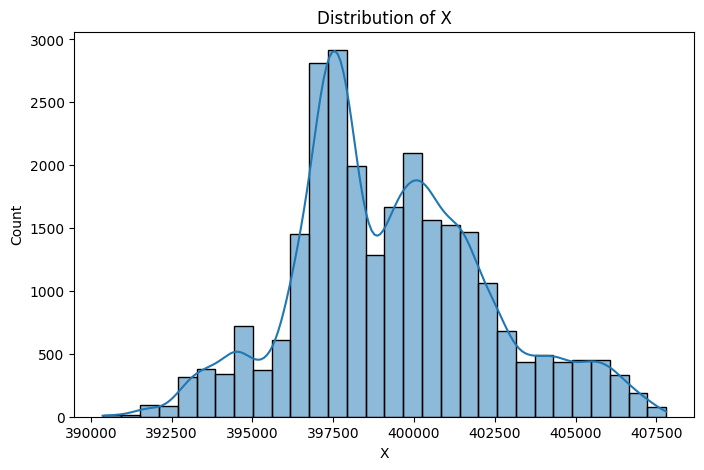

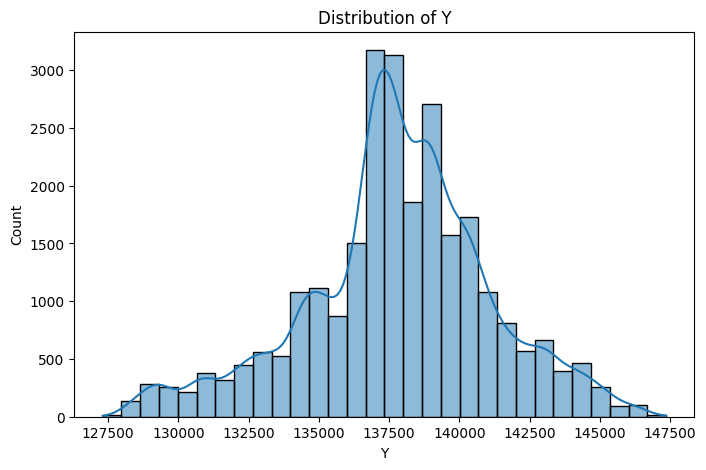

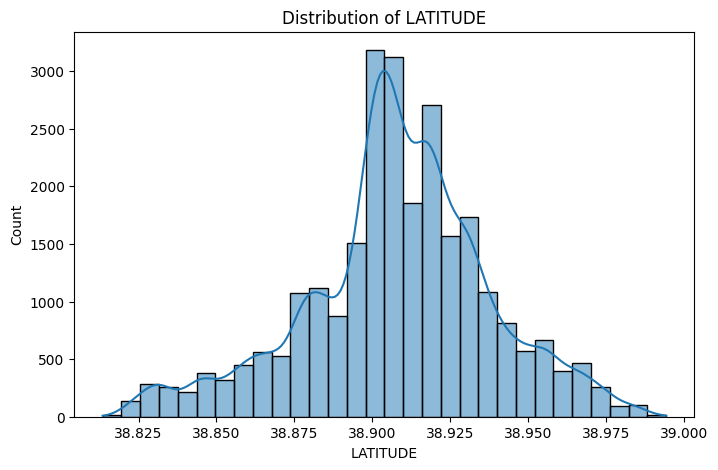

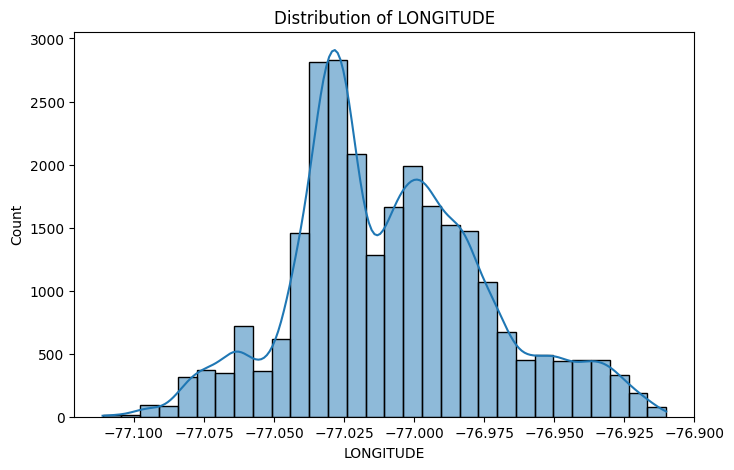

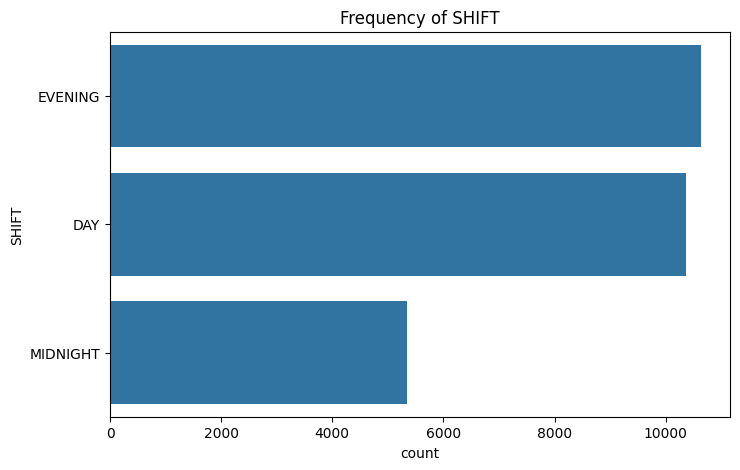

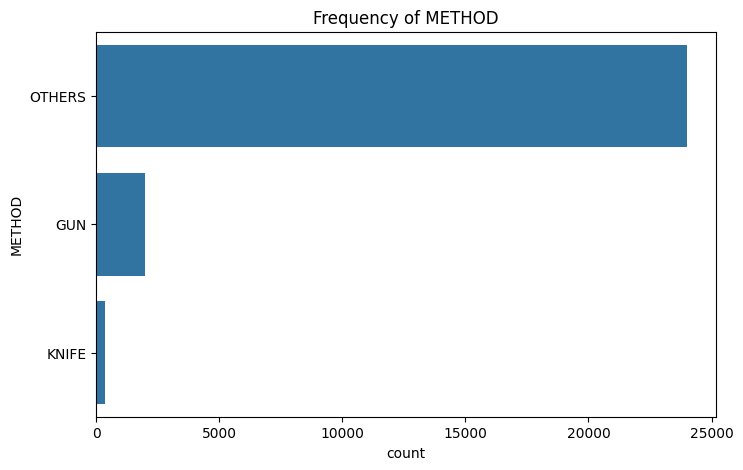

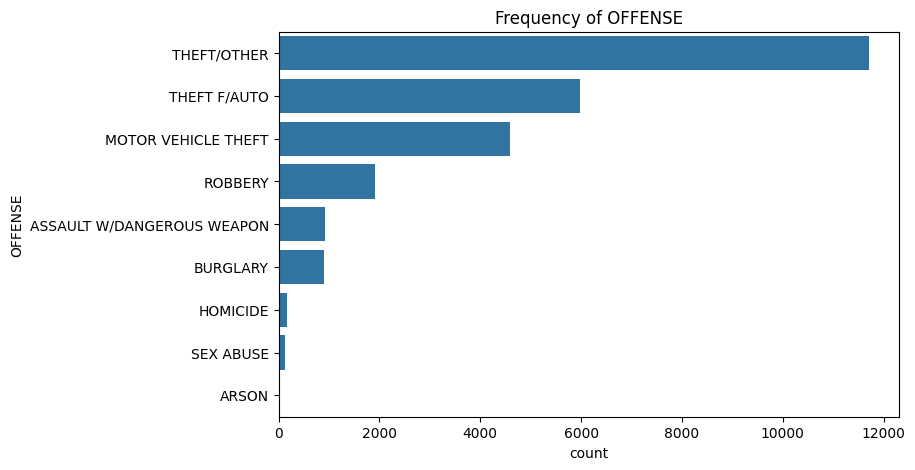

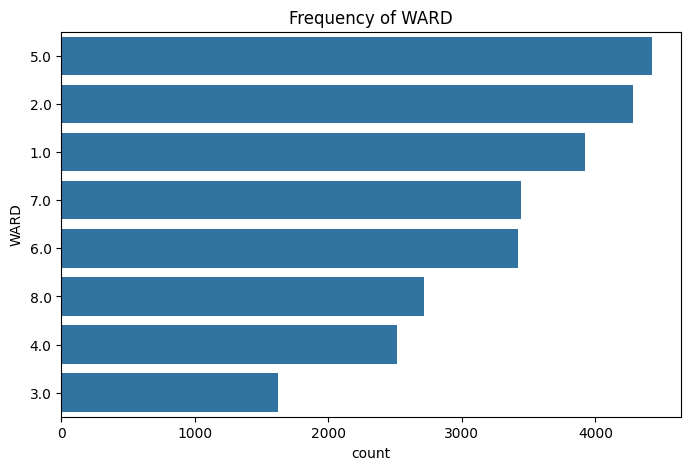

In [ ]:
# Univariate analysis for numerical columns
numerical_columns = ['X', 'Y', 'LATITUDE', 'LONGITUDE']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Univariate analysis for categorical columns
categorical_columns = ['SHIFT', 'METHOD', 'OFFENSE', 'WARD']
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.show()

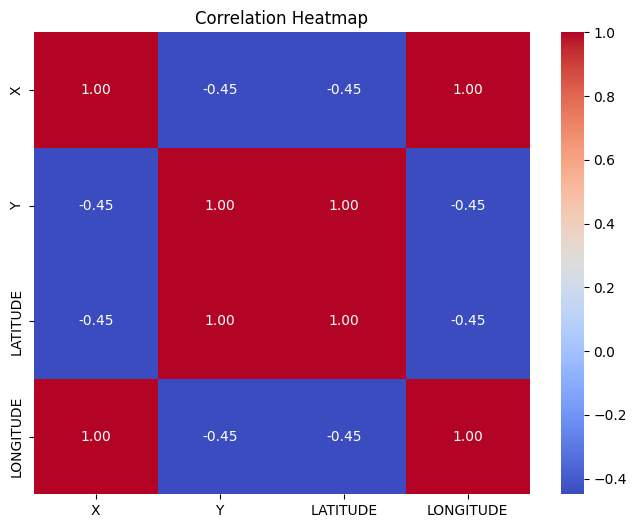

In [ ]:
# Correlation heatmap for numerical variables
correlation_matrix = df[['X', 'Y', 'LATITUDE', 'LONGITUDE']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

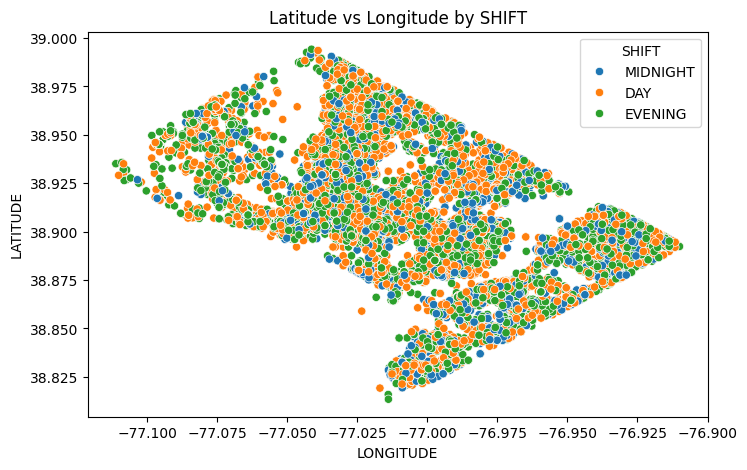

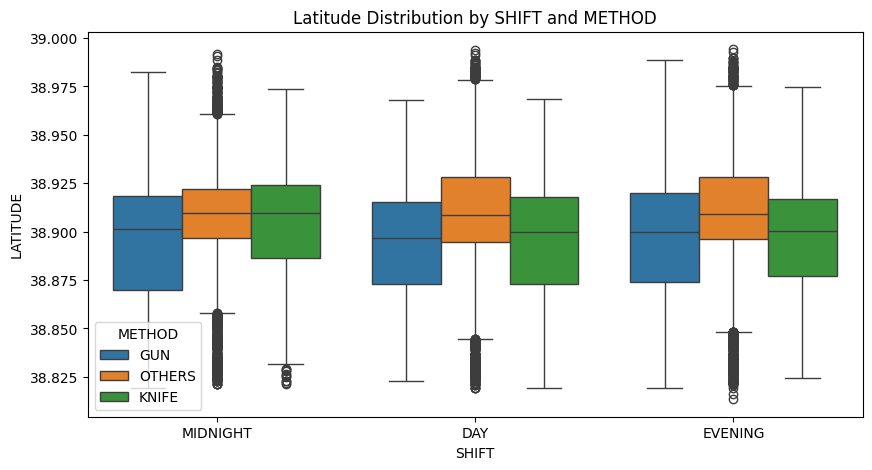

In [ ]:
# Scatter plot of Latitude vs Longitude colored by SHIFT
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='SHIFT', palette='tab10')
plt.title('Latitude vs Longitude by SHIFT')
plt.show()

# Box plot to analyze OFFENSE based on SHIFT
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='SHIFT', y='LATITUDE', hue='METHOD')
plt.title('Latitude Distribution by SHIFT and METHOD')
plt.show()

OFFENSE   ARSON  ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  \
SHIFT                                                             
DAY           1                         172       390         0   
EVENING       3                         339       236         0   
MIDNIGHT      0                         414       273       177   

OFFENSE   MOTOR VEHICLE THEFT  ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  
SHIFT                                                                         
DAY                      1865      376         32          2859         4675  
EVENING                  1777      703         62          2109         5398  
MIDNIGHT                  955      838         44          1006         1635  


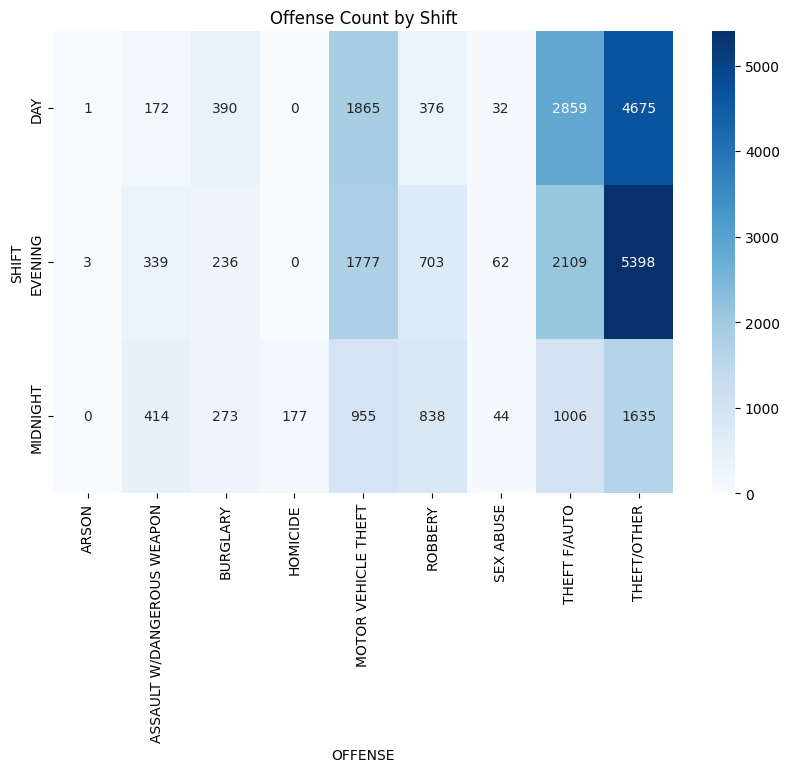

In [ ]:
# Crosstab of SHIFT and OFFENSE
crosstab = pd.crosstab(df['SHIFT'], df['OFFENSE'])
print(crosstab)

# Heatmap of the crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt="d")
plt.title('Offense Count by Shift')
plt.show()

<Axes: >

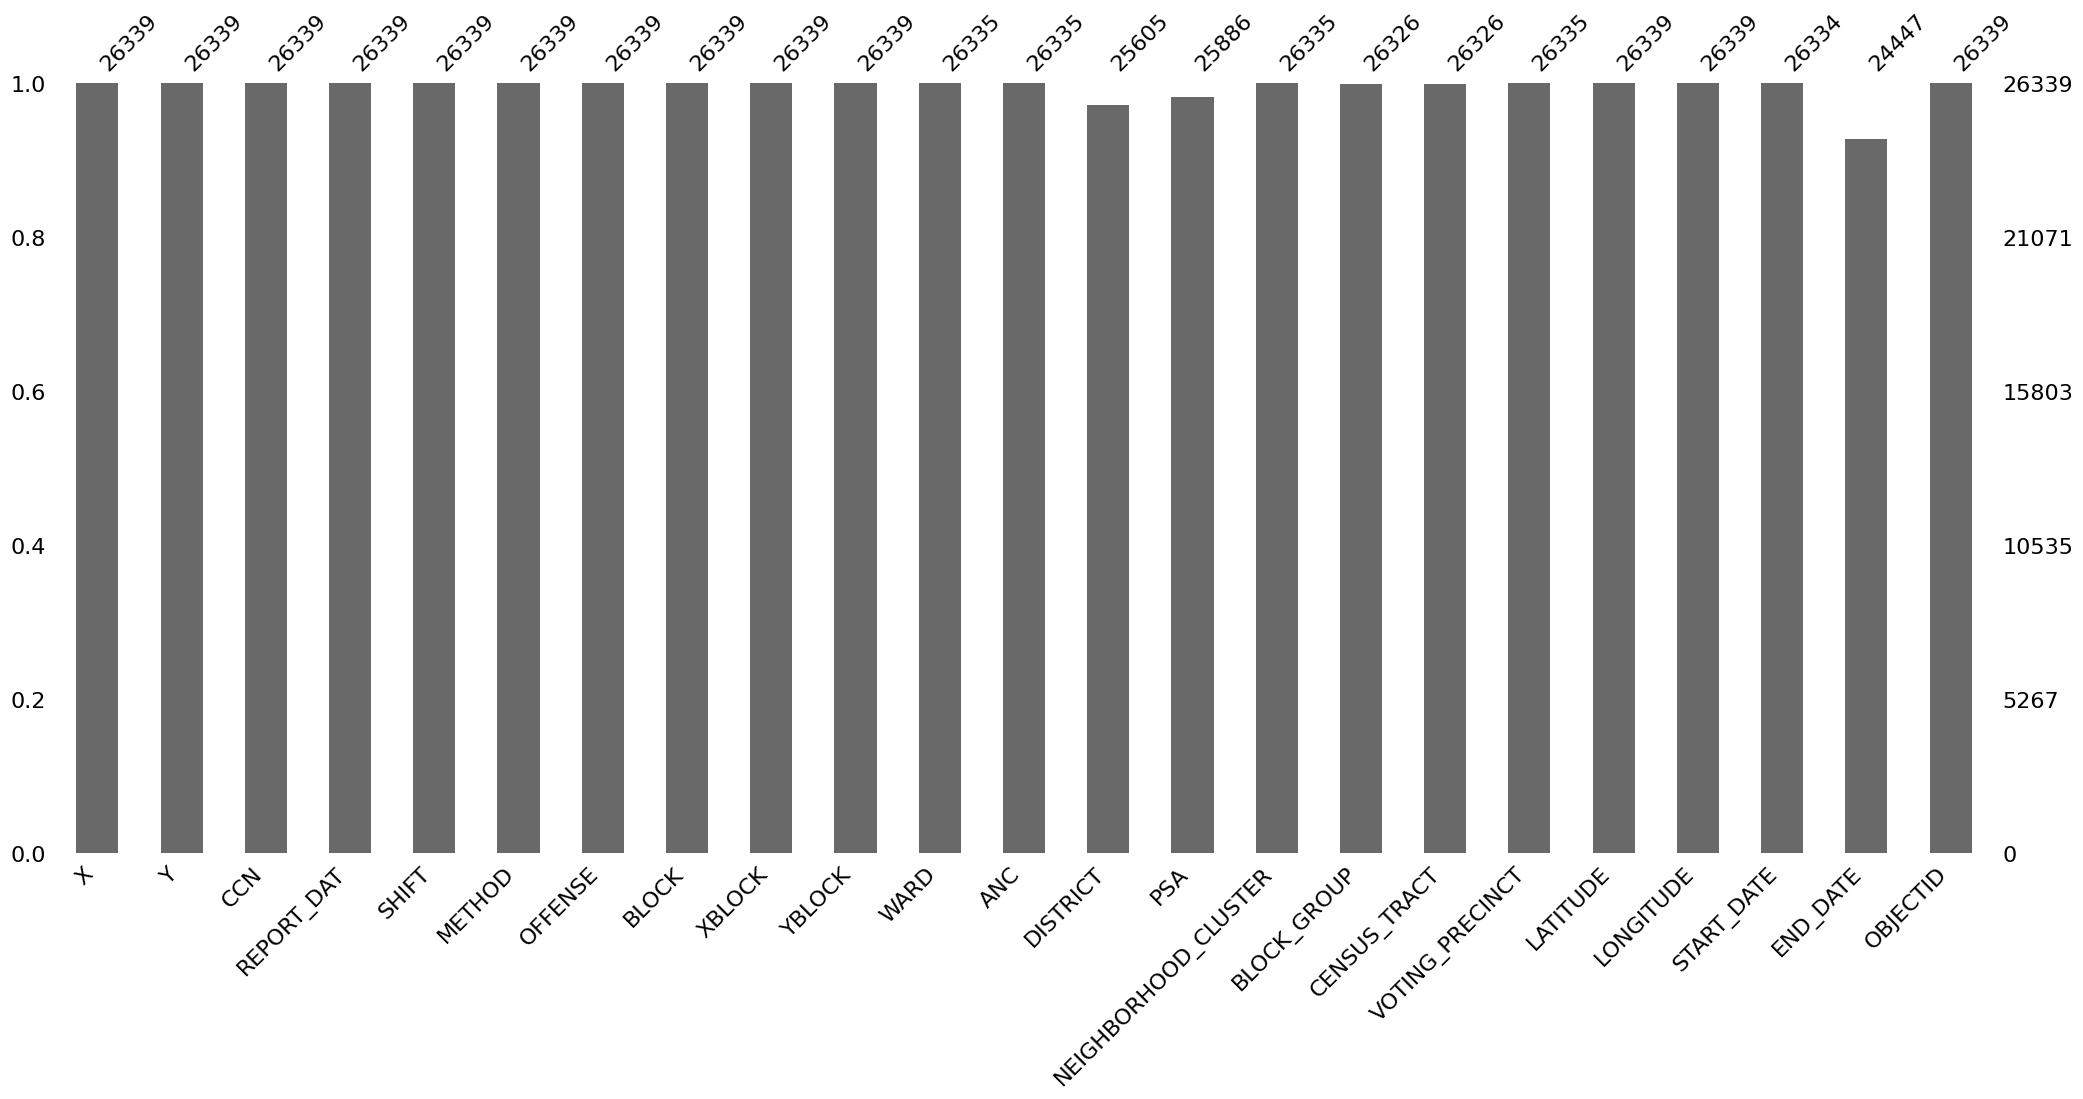

In [ ]:
msno.bar(df2)

<Axes: >

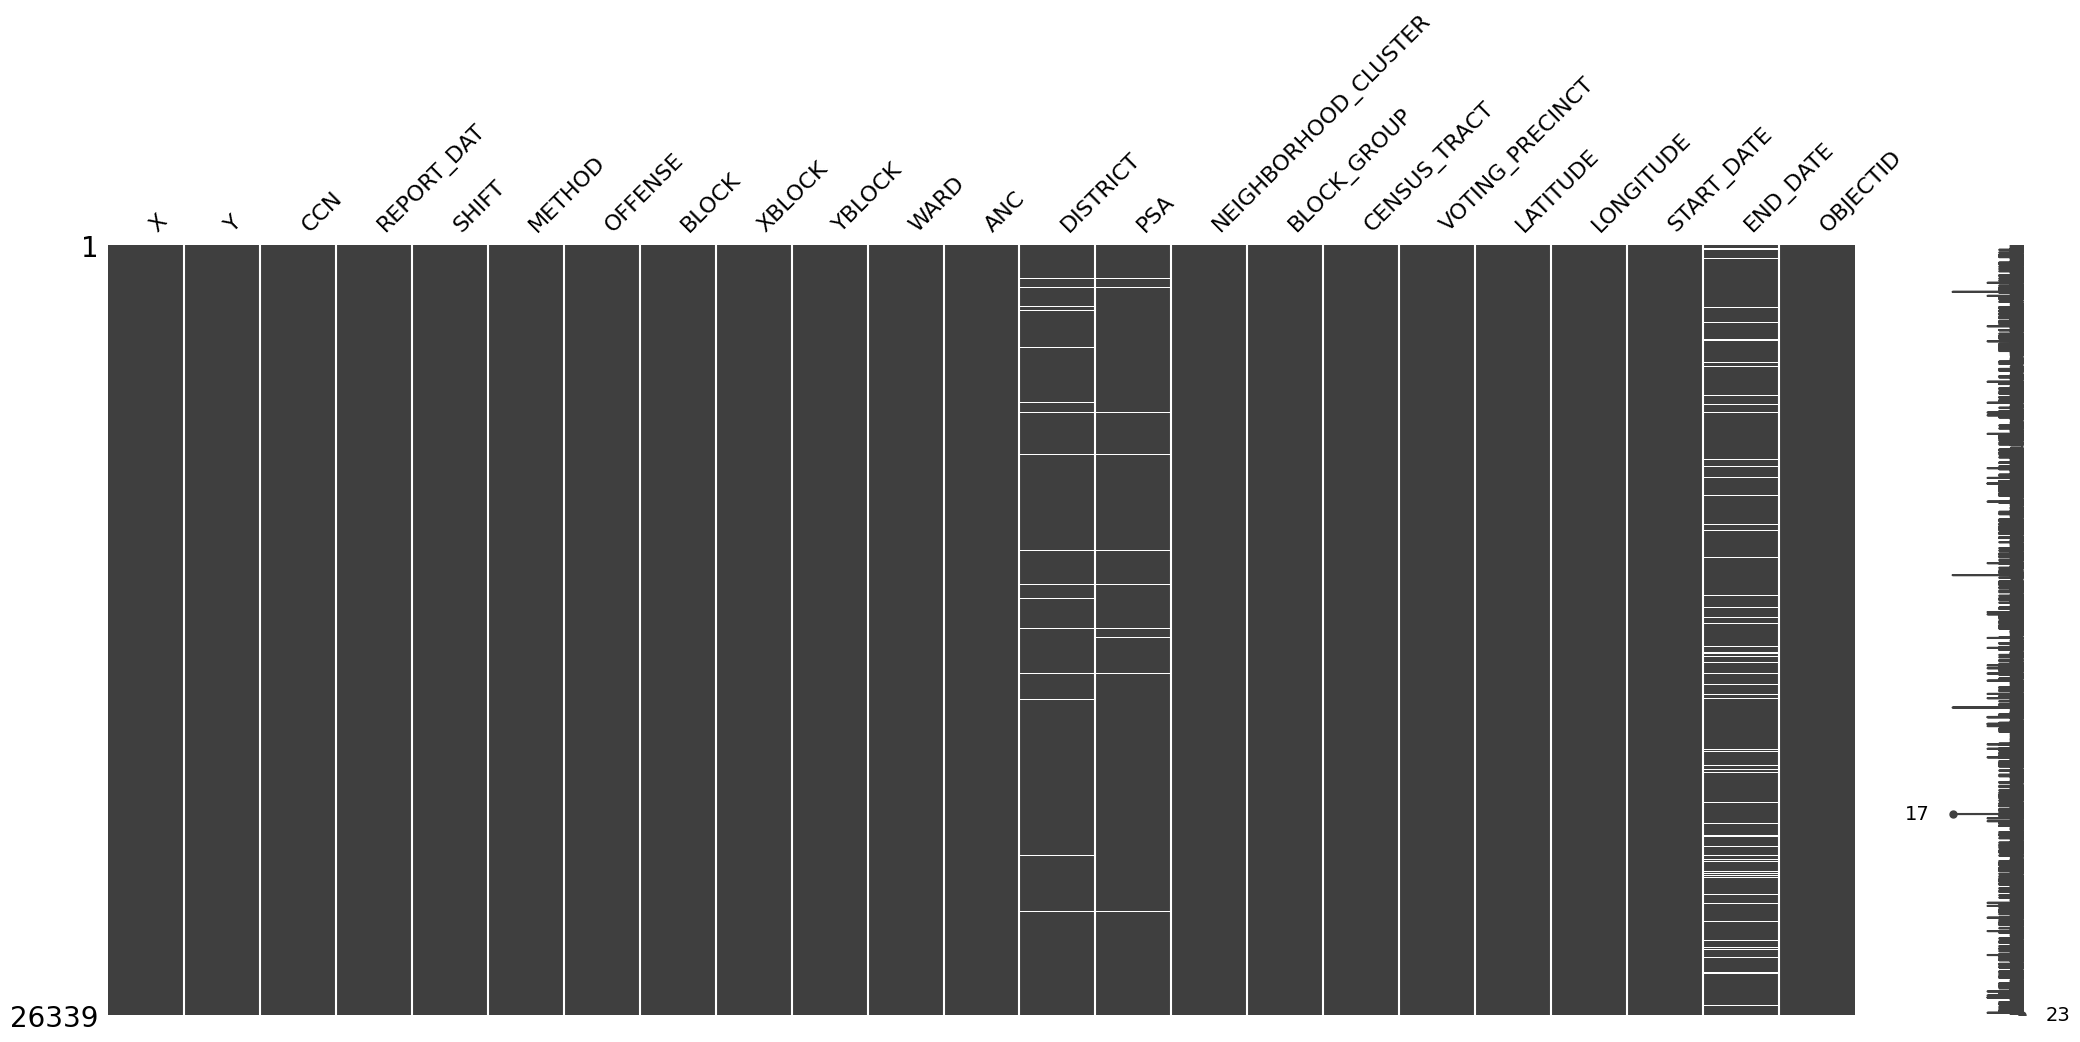

In [ ]:
msno.matrix(df2)

<Axes: >

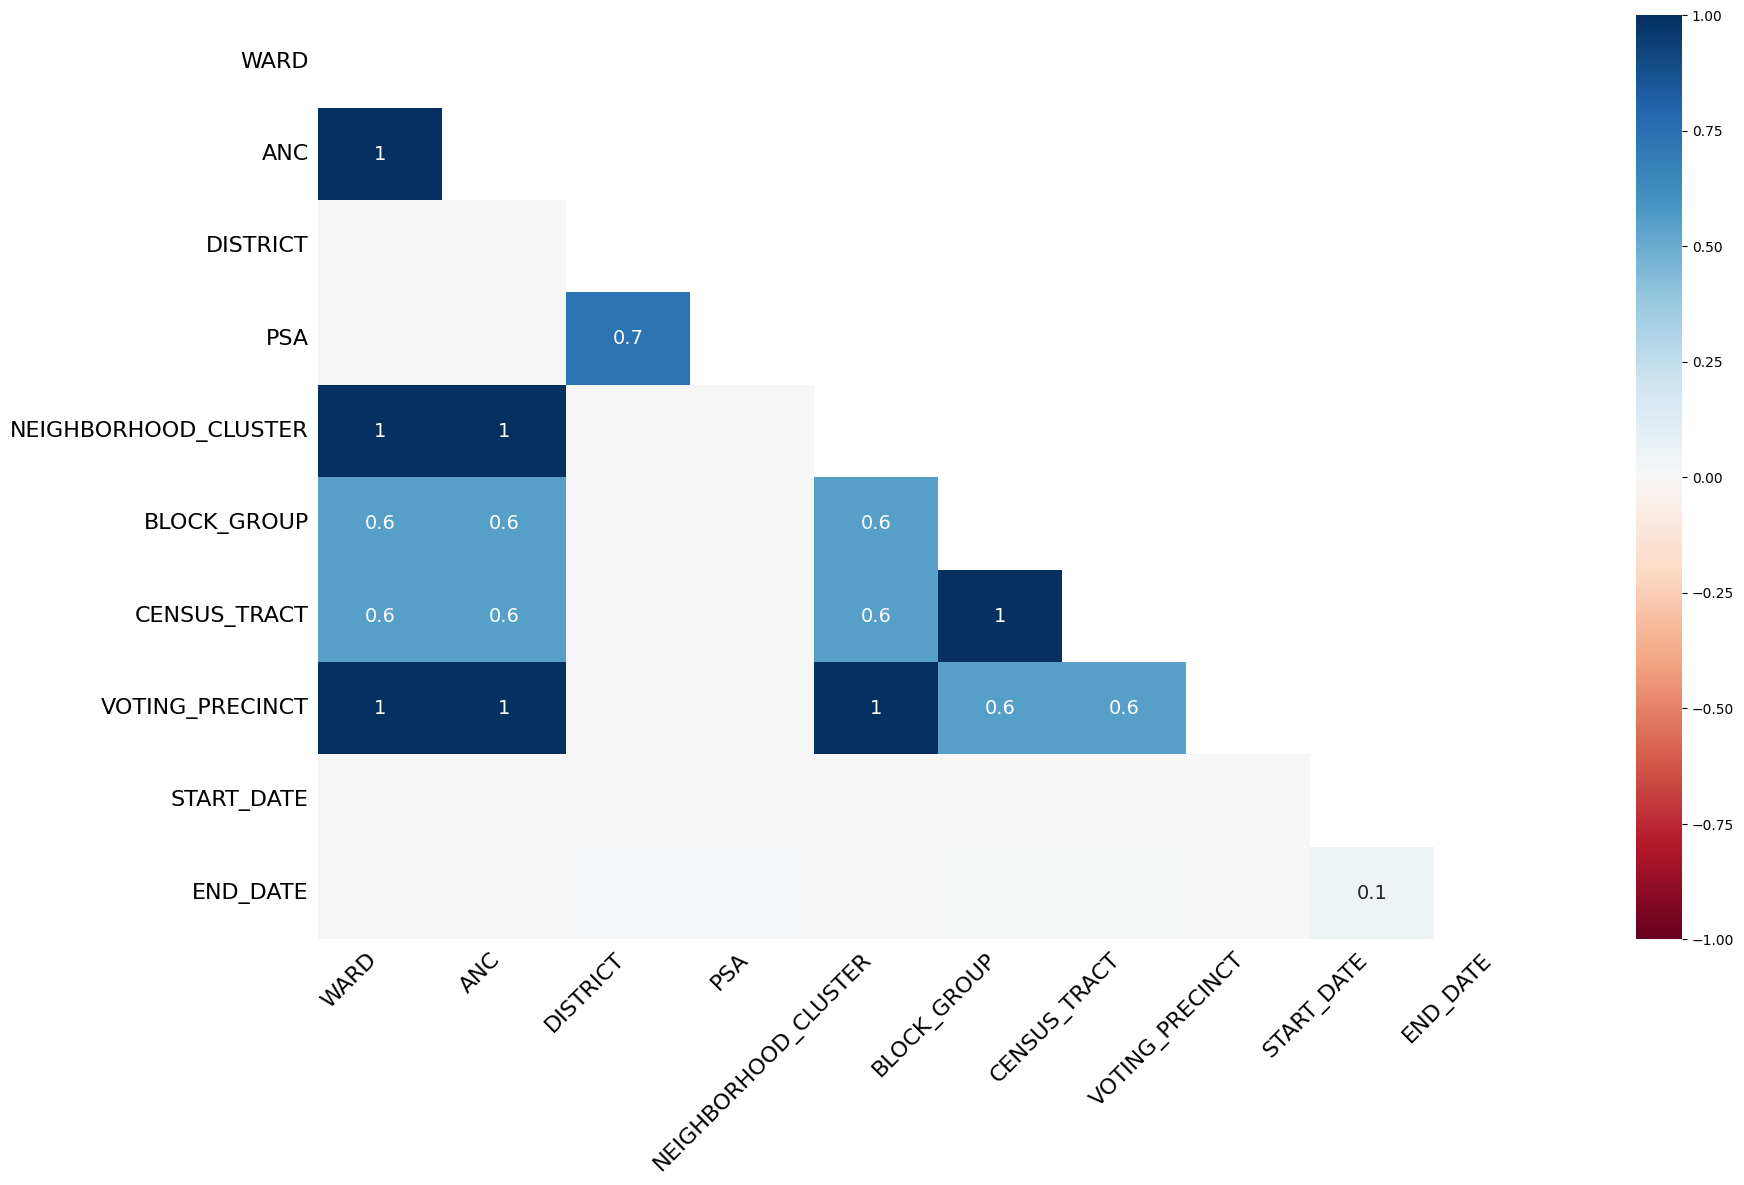

In [ ]:
msno.heatmap(df2)

<Axes: >

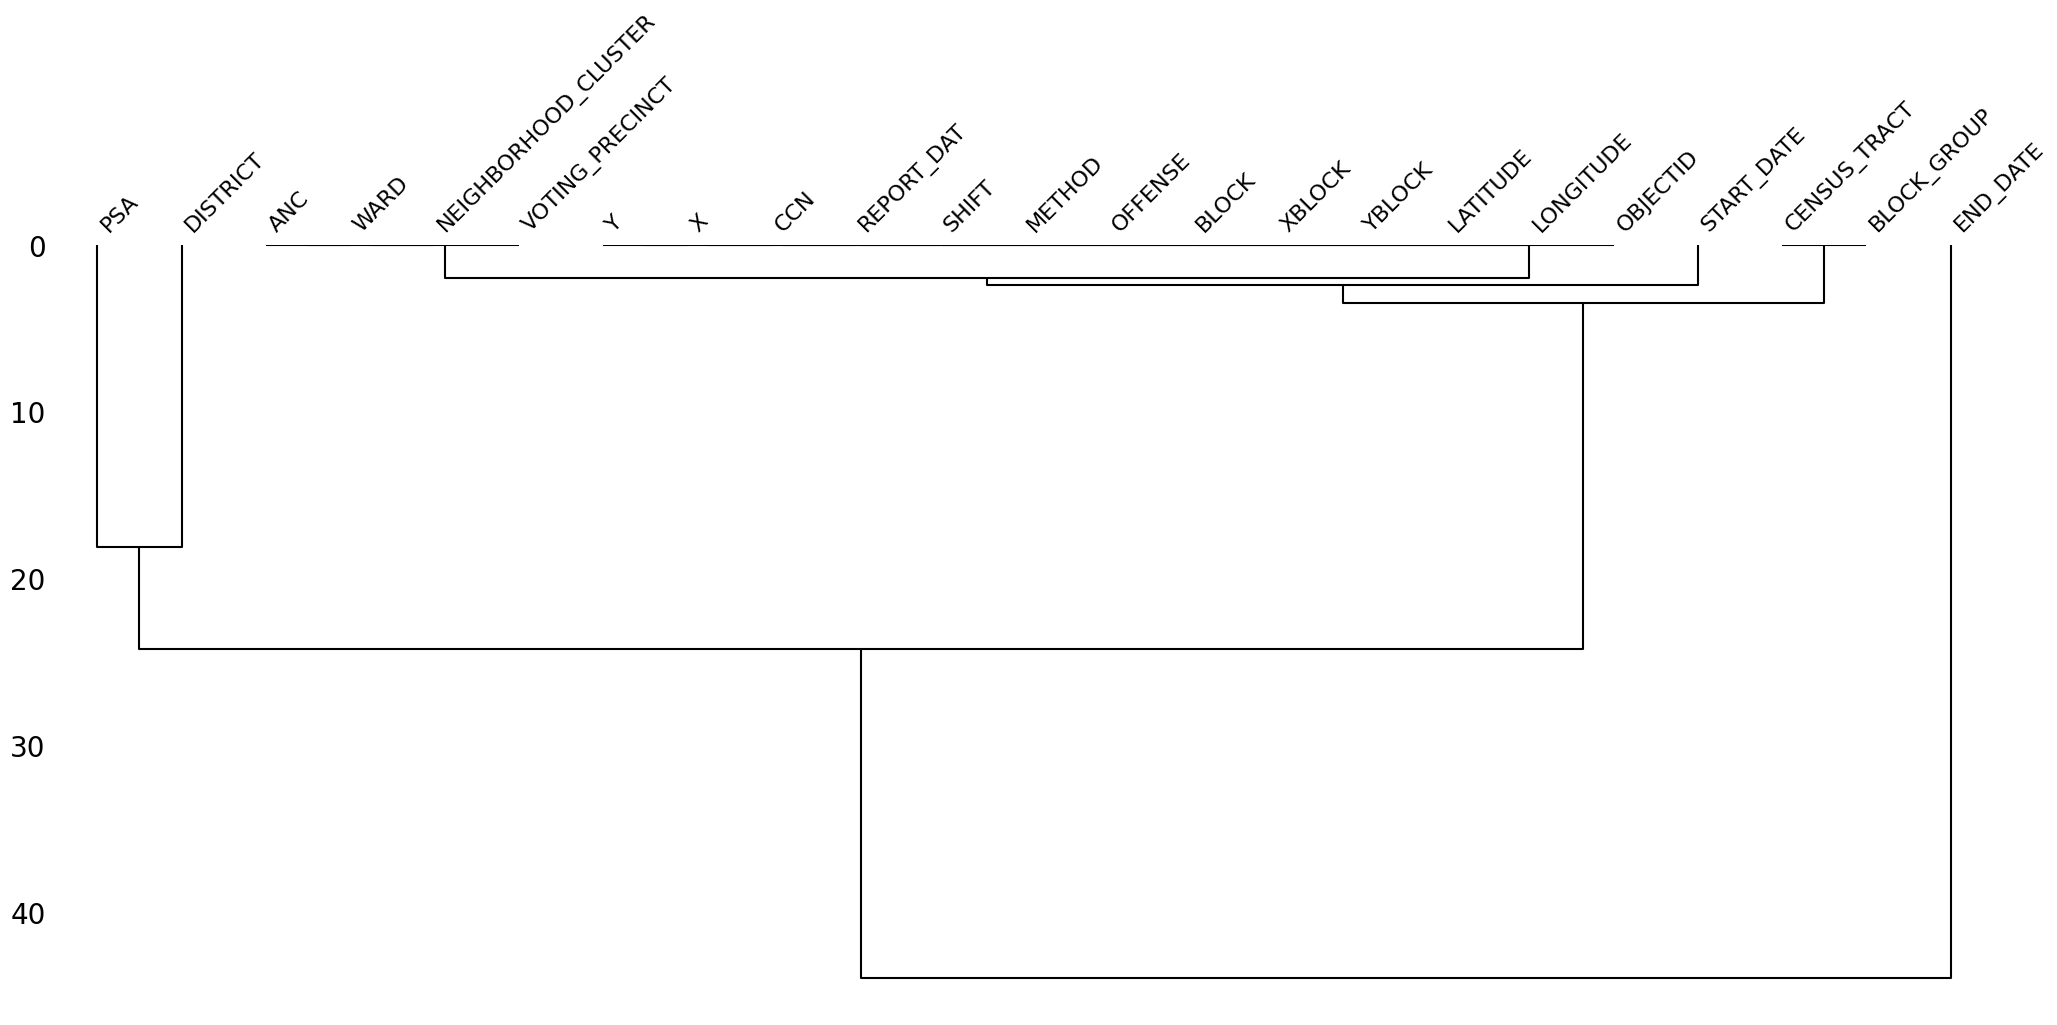

In [ ]:
msno.dendrogram(df2)

In [ ]:
categorical_columns = df2.select_dtypes(include=['object']).columns
categorical_columns



Index(['REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK', 'ANC',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'VOTING_PRECINCT', 'START_DATE',
       'END_DATE'],
      dtype='object')

In [ ]:
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['X', 'Y', 'CCN', 'XBLOCK', 'YBLOCK', 'WARD', 'DISTRICT', 'PSA',
       'CENSUS_TRACT', 'LATITUDE', 'LONGITUDE', 'OBJECTID'],
      dtype='object')

In [ ]:
df2_cat = df2[categorical_columns]
df2_cat

,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,VOTING_PRECINCT,START_DATE,END_DATE
0,2024/09/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,100 - 146 BLOCK OF WAYNE PLACE SE,8D,Cluster 39,009803 3,Precinct 124,2005/07/18 08:40:00+00,2024/09/30 13:30:00+00
1,2024/01/03 07:08:57+00,MIDNIGHT,OTHERS,THEFT/OTHER,100 - 222 BLOCK OF 35TH STREET NE,7F,Cluster 32,009603 3,Precinct 102,2024/01/03 03:10:00+00,2024/01/03 04:37:00+00
2,2024/01/05 18:59:05+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4600 - 4699 BLOCK OF EASY PLACE SE,7E,Cluster 33,007707 2,Precinct 106,2024/01/05 16:13:00+00,2024/01/05 16:54:00+00
3,2024/01/06 01:07:04+00,EVENING,GUN,ROBBERY,1900 - 1925 BLOCK OF 4TH STREET NW,1B,Cluster 3,003400 1,Precinct 20,2024/01/05 23:49:00+00,2024/01/05 23:49:00+00
4,2024/01/06 06:59:30+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 4TH STREET NE,5D,Cluster 23,008803 2,Precinct 76,2024/01/06 06:33:00+00,2024/01/06 07:00:00+00
...,...,...,...,...,...,...,...,...,...,...,...
26334,2024/03/01 20:26:50+00,EVENING,OTHERS,THEFT/OTHER,300 - 399 BLOCK OF MORSE STREET NE,5D,Cluster 23,008803 2,Precinct 76,2024/02/28 19:06:00+00,2024/02/28 20:08:00+00
26335,2024/03/30 10:35:26+00,MIDNIGHT,OTHERS,BURGLARY,1761 - 1780 BLOCK OF COLUMBIA ROAD NW,1C,Cluster 1,003901 2,Precinct 35,2024/03/30 09:07:00+00,2024/03/30 09:34:00+00
26336,2024/04/07 07:08:48+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2600 - 2699 BLOCK OF 28TH STREET NE,5C,Cluster 22,011100 1,Precinct 71,2024/04/07 00:56:00+00,2024/04/07 02:52:00+00
26337,2024/04/09 18:24:02+00,DAY,OTHERS,MOTOR VEHICLE THEFT,2300 - 2499 BLOCK OF WASHINGTON PLACE NE,5C,Cluster 22,009102 4,Precinct 72,2024/04/07 14:35:00+00,2024/04/07 16:14:00+00


In [ ]:
df2_num = df2[numeric_columns]
df2_num

,X,Y,CCN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,CENSUS_TRACT,LATITUDE,LONGITUDE,OBJECTID
0,399581.5100,129706.9200,5094764,399581.510000,129706.920000,8.0,7.0,707.0,9803.0,38.835154,-77.004820,629515303
1,403992.4500,135998.8200,24001130,403992.450000,135998.820000,7.0,6.0,603.0,9603.0,38.891825,-76.953980,629765887
2,405841.8415,134205.6072,24002349,405841.841539,134205.607162,7.0,6.0,604.0,7707.0,38.875661,-76.932677,629765888
3,398491.1900,138718.1700,24002586,398491.190000,138718.170000,1.0,3.0,306.0,3400.0,38.916330,-77.017398,629765889
4,400121.3800,137998.9000,24002733,400121.380000,137998.900000,5.0,5.0,501.0,8803.0,38.909852,-76.998601,629765890
...,...,...,...,...,...,...,...,...,...,...,...,...
26334,399978.8000,137790.8200,24031916,399978.800000,137790.820000,5.0,5.0,501.0,8803.0,38.907977,-77.000244,630054026
26335,396378.9500,139491.3400,24047512,396378.950000,139491.340000,1.0,3.0,303.0,3901.0,38.923288,-77.041758,630054061
26336,402769.4500,139567.0500,24051570,402769.450000,139567.050000,5.0,5.0,503.0,11100.0,38.923974,-76.968063,630054062
26337,400541.5000,139301.4000,24051785,400541.500000,139301.400000,5.0,5.0,505.0,9102.0,38.921585,-76.993756,630054063


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def little_mcar_test(data):
    """
    Performs Little's MCAR test on a dataset with numerical columns only.

    Parameters:
        data (pd.DataFrame): A DataFrame containing numerical columns.

    Returns:
        dict: A dictionary containing the chi-square statistic, degrees of freedom, p-value,
              and a boolean indicating whether the missing values are MCAR.
    """
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a pandas DataFrame.")

    if not all(np.issubdtype(dtype, np.number) for dtype in data.dtypes):
        raise ValueError("Dataset must contain numerical columns only.")

    # Drop rows with no missing values (Little's test is performed on rows with missing values)
    missing_data = data.dropna(how="all")

    # Fill missing values with column means
    mean_imputed = missing_data.fillna(missing_data.mean())

    # Calculate observed means and covariance
    observed_means = mean_imputed.mean()
    observed_cov = np.cov(mean_imputed, rowvar=False)

    # Identify missing patterns
    missing_mask = missing_data.isnull().astype(int)
    patterns = missing_mask.groupby(missing_mask.columns.tolist()).size()

    chi_square_stat = 0
    dof = 0

    for pattern, count in patterns.items():
        mask = np.array(pattern, dtype=bool)
        sub_data = missing_data.loc[:, ~mask]
        sub_means = observed_means[~mask]
        sub_cov = observed_cov[~mask][:, ~mask]

        diff = sub_data.mean() - sub_means
        chi_square_stat += count * diff.T @ np.linalg.inv(sub_cov) @ diff
        dof += sub_data.shape[1]

    # Calculate p-value
    p_value = chi2.sf(chi_square_stat, dof)

    return {
        "chi_square_stat": chi_square_stat,
        "degrees_of_freedom": dof,
        "p_value": p_value,
        "is_mcar": p_value > 0.05  # Null hypothesis: MCAR
    }




result = little_mcar_test(df2_num)
print("Little's MCAR Test Result:")
print(result)



Little's MCAR Test Result:
{'chi_square_stat': 1.2524175722706717e-25, 'degrees_of_freedom': 65, 'p_value': 1.0, 'is_mcar': True}


In [ ]:
df2_num.isnull().sum()

,0
X,0
Y,0
CCN,0
XBLOCK,0
YBLOCK,0
WARD,4
DISTRICT,734
PSA,453
CENSUS_TRACT,13
LATITUDE,0


In [ ]:
result = little_mcar_test(df2_num)

print('P value:', result['p_value'])
print('Chi-square statistic:', result['chi2_stat'])
print('Degrees of freedom:', result['degrees_of_freedom'])
print(is_mcar(result['p_value']))

ValueError: No missing data found.

In [ ]:
df2_cat.isnull().sum()

,0
REPORT_DAT,0
SHIFT,0
METHOD,0
OFFENSE,0
BLOCK,0
ANC,4
NEIGHBORHOOD_CLUSTER,4
BLOCK_GROUP,13
VOTING_PRECINCT,4
START_DATE,5


In [ ]:
# Impute missing values for categorical features with mode
df2['ANC'].fillna(df2['ANC'].mode()[0], inplace=True)
df2['NEIGHBORHOOD_CLUSTER'].fillna(df2['NEIGHBORHOOD_CLUSTER'].mode()[0], inplace=True)
df2['VOTING_PRECINCT'].fillna(df2['VOTING_PRECINCT'].mode()[0], inplace=True)
df2['BLOCK_GROUP'].fillna(df2['BLOCK_GROUP'].mode()[0], inplace=True)

# Convert 'START_DATE' to datetime format, handling errors
df2['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

# Check if there are any NaT (Not a Time) values after conversion
print(df2[df2['START_DATE'].isnull()])

# Impute missing 'START_DATE' using forward fill
df2['START_DATE'].fillna(df2['START_DATE'].mode()[0], inplace=True)

# Impute missing 'END_DATE' based on 'START_DATE' + a default duration (e.g., 3 days)
df2['END_DATE'] = pd.to_datetime(df2['END_DATE'], errors='coerce')  # Ensure 'END_DATE' is in datetime format
df2['END_DATE'] = df2['END_DATE'].fillna(df2['START_DATE'] + pd.Timedelta(days=3))

# Verify the result
print(df2[['START_DATE', 'END_DATE']].head())

                X            Y       CCN              REPORT_DAT     SHIFT  \
4299   397229.120  138854.5400  24170758  2024/11/03 05:21:58+00  MIDNIGHT   
4750   401627.937  132937.3269  24021001  2024/02/10 07:51:29+00  MIDNIGHT   
5678   399162.790  137319.7000  24153130  2024/10/03 16:50:51+00       DAY   
6818   397426.470  139181.2553  24014779  2024/01/30 05:34:53+00  MIDNIGHT   
14230  393930.750  143053.2700  24089639  2024/06/13 03:01:05+00  MIDNIGHT   

       METHOD                     OFFENSE  \
4299   OTHERS         MOTOR VEHICLE THEFT   
4750   OTHERS  ASSAULT W/DANGEROUS WEAPON   
5678   OTHERS                 THEFT/OTHER   
6818   OTHERS         MOTOR VEHICLE THEFT   
14230  OTHERS                THEFT F/AUTO   

                                            BLOCK         XBLOCK  \
4299          2000 - 2099 BLOCK OF 14TH STREET NW  397229.120000   
4750             1600 - 1699 BLOCK OF V STREET SE  401627.936959   
5678                  1 - 39 BLOCK OF L STREET NW  39916

<ipython-input-116-15f3374a125d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['ANC'].fillna(df2['ANC'].mode()[0], inplace=True)
<ipython-input-116-15f3374a125d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
df2.isnull().sum()

,0
X,0
Y,0
CCN,0
REPORT_DAT,0
SHIFT,0
METHOD,0
OFFENSE,0
BLOCK,0
XBLOCK,0
YBLOCK,0


The missing values in Categorical Data have been dealt with.

In [ ]:
df2_num.isnull().sum()

,0
X,0
Y,0
CCN,0
XBLOCK,0
YBLOCK,0
WARD,4
DISTRICT,734
PSA,453
CENSUS_TRACT,13
LATITUDE,0


In [ ]:
# Impute missing values for numeric features with mean
df2['WARD'].fillna(df2['WARD'].mean(), inplace=True)
df2['DISTRICT'].fillna(df2['DISTRICT'].mean(), inplace=True)
df2['PSA'].fillna(df2['PSA'].mean(), inplace=True)
df2['CENSUS_TRACT'].fillna(df2['CENSUS_TRACT'].mean(), inplace=True)

<ipython-input-119-30a2fd9e7500>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['WARD'].fillna(df2['WARD'].mean(), inplace=True)
<ipython-input-119-30a2fd9e7500>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

As we can see, all the missing values have been dealt with.

In [ ]:
df2.isnull().sum()

,0
X,0
Y,0
CCN,0
REPORT_DAT,0
SHIFT,0
METHOD,0
OFFENSE,0
BLOCK,0
XBLOCK,0
YBLOCK,0


In [ ]:
# 1. **IQR Method** for Numeric Outliers
def detect_outliers_iqr(df):
    outliers = {}
    for col in df:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(df2_num)
print("Outliers detected using IQR method:")
for col, outlier_data in outliers_iqr.items():
    print(f"\nOutliers in column '{col}':")
    print(outlier_data)



Outliers detected using IQR method:

Outliers in column 'X':
                 X            Y       CCN         XBLOCK         YBLOCK  WARD  \
598    407609.0135  136201.1256  24008378  407609.013477  136201.125628   7.0   
855    407601.5900  136375.7800  24019635  407601.590000  136375.780000   7.0   
1346   390695.7700  140453.5200  24093409  390695.770000  140453.520000   3.0   
1697   407251.8246  136369.7599  24153681  407251.824581  136369.759868   7.0   
1899   391145.5400  139755.4900  24160745  391145.540000  139755.490000   3.0   
...            ...          ...       ...            ...            ...   ...   
24699  407370.4918  136369.8233  24027364  407370.491845  136369.823260   7.0   
25177  407673.4900  136306.2100  24061643  407673.490000  136306.210000   7.0   
25502  407192.0908  136592.4208  24141881  407192.090757  136592.420796   7.0   
25643  407489.5933  136068.5293  24161200  407489.593317  136068.529308   7.0   
26134  407489.1920  136369.3766  24172852  40748

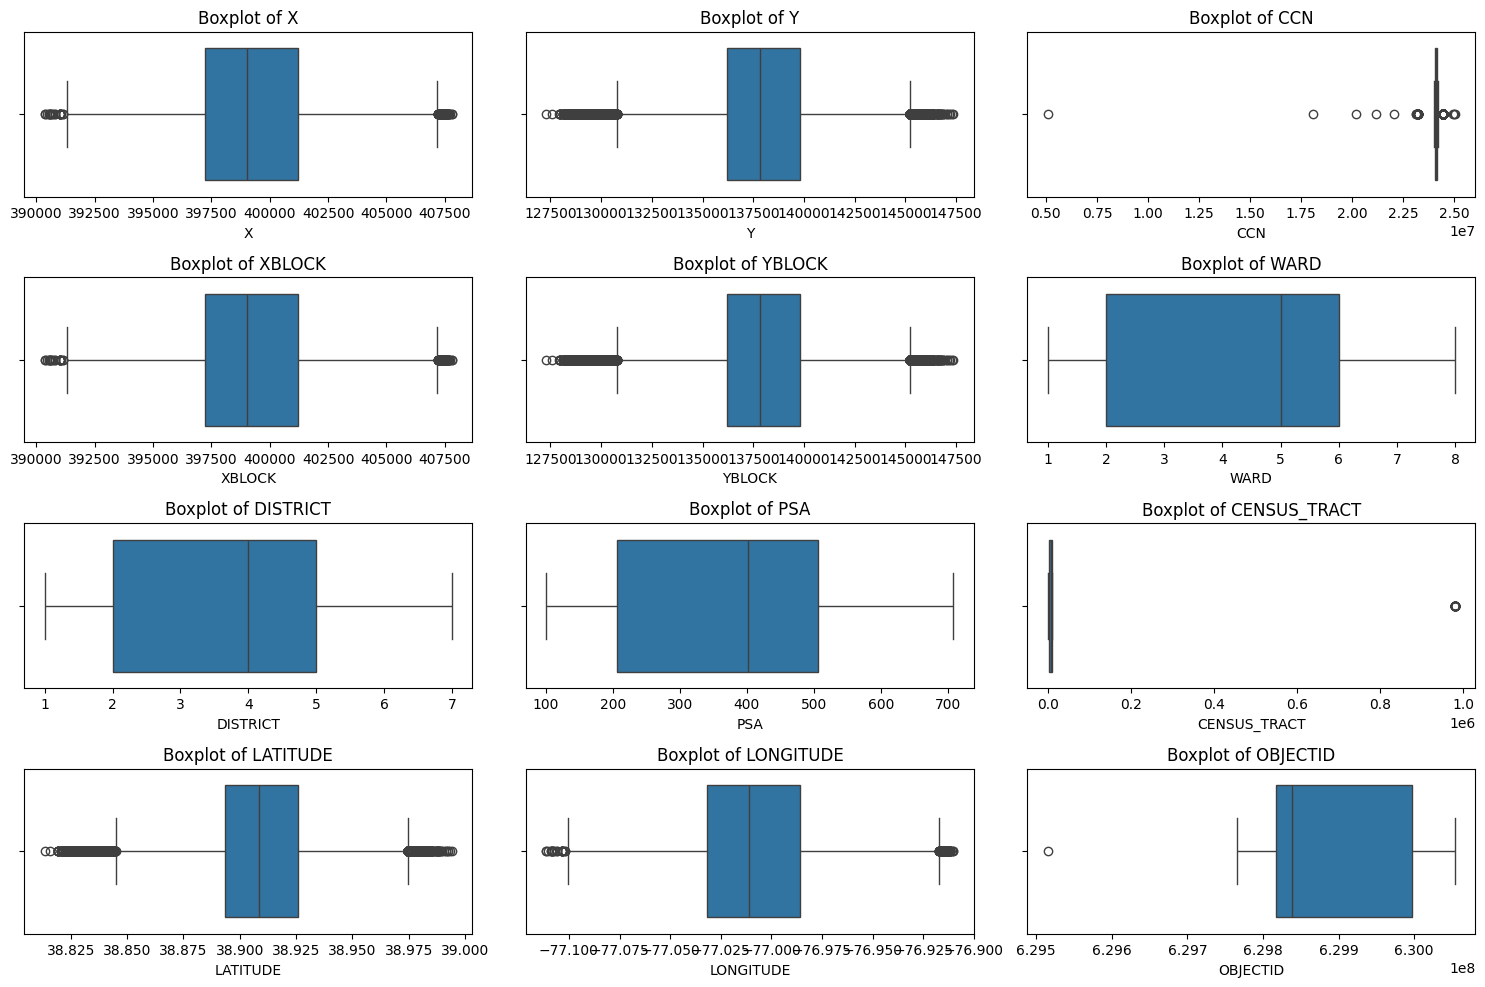

In [ ]:
# List of the columns you want to plot
columns_to_plot = ['X', 'Y', 'CCN', 'XBLOCK', 'YBLOCK', 'WARD', 'DISTRICT', 'PSA', 'CENSUS_TRACT', 'LATITUDE', 'LONGITUDE', 'OBJECTID']

# Set the figure size for the boxplots
plt.figure(figsize=(15, 12))

# Loop through each specified column and plot a boxplot
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot)//3 + 1, 3, i)  # Adjust number of rows/columns for subplots
    sns.boxplot(data=df, x=col)  # Create boxplot for the column
    plt.title(f'Boxplot of {col}')  # Title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


From studying the box plots, we can figure out that the columns containing the coordinates of the location of the crimes contain significant outliers which need to be dealt with, while other columns like "CCN" and "OBJECTID" which also contain outliers are merely identification tags and hence their outliers can be ignored since they are not much use in future data analysis.

In [ ]:
correlation = df2['X'].corr(df2['XBLOCK'], method='pearson')
print(f"Pearson Correlation: {correlation}")

correlation = df2['Y'].corr(df2['YBLOCK'], method='pearson')
print(f"Pearson Correlation: {correlation}")

correlation = df2['X'].corr(df2['LONGITUDE'], method='pearson')
print(f"Pearson Correlation: {correlation}")

correlation = df2['Y'].corr(df2['LATITUDE'], method='pearson')
print(f"Pearson Correlation: {correlation}")

correlation = df2['LONGITUDE'].corr(df2['XBLOCK'], method='pearson')
print(f"Pearson Correlation: {correlation}")

correlation = df2['LATITUDE'].corr(df2['YBLOCK'], method='pearson')
print(f"Pearson Correlation: {correlation}")

Pearson Correlation: 1.0
Pearson Correlation: 1.0
Pearson Correlation: 0.9999999463012285
Pearson Correlation: 0.999999972503696
Pearson Correlation: 0.9999999463012184
Pearson Correlation: 0.9999999725036924


**Pearson Correlation**

The Pearson correlation coefficient (denoted as 𝑟) measures the strength and direction of a linear relationship between two continuous variables. It assumes that the variables are linearly related, meaning if one variable increases, the other tends to increase or decrease proportionally.



We can see that columns "X","XBLOCK" and "LONGITUDE" have almost same values, same for "Y","YBLOCK" and "LATITDUE". Hence we can drop "X", "Y" , "XBLOCK" and "YBLOCK" columns as it would not affect our dataset since the "LATITUDE" and "LONGITUDE" columns contain the same information.

In [ ]:
df2.drop(columns =["XBLOCK", "YBLOCK"] , inplace=True)
df2

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,WARD,ANC,...,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,START_DATE,END_DATE,OBJECTID
0,399581.5100,129706.9200,5094764,2024/09/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,100 - 146 BLOCK OF WAYNE PLACE SE,8.0,8D,...,707.0,Cluster 39,009803 3,9803.0,Precinct 124,38.835154,-77.004820,2005-07-18 08:40:00+00:00,2024-09-30 13:30:00+00:00,629515303
1,403992.4500,135998.8200,24001130,2024/01/03 07:08:57+00,MIDNIGHT,OTHERS,THEFT/OTHER,100 - 222 BLOCK OF 35TH STREET NE,7.0,7F,...,603.0,Cluster 32,009603 3,9603.0,Precinct 102,38.891825,-76.953980,2024-01-03 03:10:00+00:00,2024-01-03 04:37:00+00:00,629765887
2,405841.8415,134205.6072,24002349,2024/01/05 18:59:05+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4600 - 4699 BLOCK OF EASY PLACE SE,7.0,7E,...,604.0,Cluster 33,007707 2,7707.0,Precinct 106,38.875661,-76.932677,2024-01-05 16:13:00+00:00,2024-01-05 16:54:00+00:00,629765888
3,398491.1900,138718.1700,24002586,2024/01/06 01:07:04+00,EVENING,GUN,ROBBERY,1900 - 1925 BLOCK OF 4TH STREET NW,1.0,1B,...,306.0,Cluster 3,003400 1,3400.0,Precinct 20,38.916330,-77.017398,2024-01-05 23:49:00+00:00,2024-01-05 23:49:00+00:00,629765889
4,400121.3800,137998.9000,24002733,2024/01/06 06:59:30+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 4TH STREET NE,5.0,5D,...,501.0,Cluster 23,008803 2,8803.0,Precinct 76,38.909852,-76.998601,2024-01-06 06:33:00+00:00,2024-01-06 07:00:00+00:00,629765890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26334,399978.8000,137790.8200,24031916,2024/03/01 20:26:50+00,EVENING,OTHERS,THEFT/OTHER,300 - 399 BLOCK OF MORSE STREET NE,5.0,5D,...,501.0,Cluster 23,008803 2,8803.0,Precinct 76,38.907977,-77.000244,2024-02-28 19:06:00+00:00,2024-02-28 20:08:00+00:00,630054026
26335,396378.9500,139491.3400,24047512,2024/03/30 10:35:26+00,MIDNIGHT,OTHERS,BURGLARY,1761 - 1780 BLOCK OF COLUMBIA ROAD NW,1.0,1C,...,303.0,Cluster 1,003901 2,3901.0,Precinct 35,38.923288,-77.041758,2024-03-30 09:07:00+00:00,2024-03-30 09:34:00+00:00,630054061
26336,402769.4500,139567.0500,24051570,2024/04/07 07:08:48+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2600 - 2699 BLOCK OF 28TH STREET NE,5.0,5C,...,503.0,Cluster 22,011100 1,11100.0,Precinct 71,38.923974,-76.968063,2024-04-07 00:56:00+00:00,2024-04-07 02:52:00+00:00,630054062
26337,400541.5000,139301.4000,24051785,2024/04/09 18:24:02+00,DAY,OTHERS,MOTOR VEHICLE THEFT,2300 - 2499 BLOCK OF WASHINGTON PLACE NE,5.0,5C,...,505.0,Cluster 22,009102 4,9102.0,Precinct 72,38.921585,-76.993756,2024-04-07 14:35:00+00:00,2024-04-07 16:14:00+00:00,630054063


In [ ]:
df2.duplicated().sum()

0

Now, District of Columbia's (DC) latitude ranges from approximately 38.8 to 38.9.

DC's longitude ranges from approximately -77.1 to -76.9.

So we will remove the outliers which are the crimes occuring outside the boundaries of DC since we are not concerned with that.

In [ ]:
# Define bounds for DC's latitudes and longitudes
latitude_bounds = (38.791, 38.995)
longitude_bounds = (-77.119, -76.909)

# Remove outliers outside DC boundaries
df2_filtered = df2[(df2['LATITUDE'] >= latitude_bounds[0]) & (df2['LATITUDE'] <= latitude_bounds[1])]
df2_filtered = df2_filtered[(df2['LONGITUDE'] >= longitude_bounds[0]) & (df2['LONGITUDE'] <= longitude_bounds[1])]


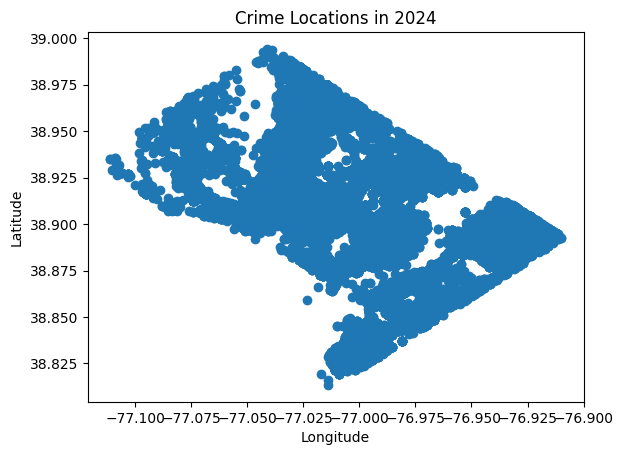

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df2['LONGITUDE'], df2['LATITUDE'])
plt.title("Crime Locations in 2024")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

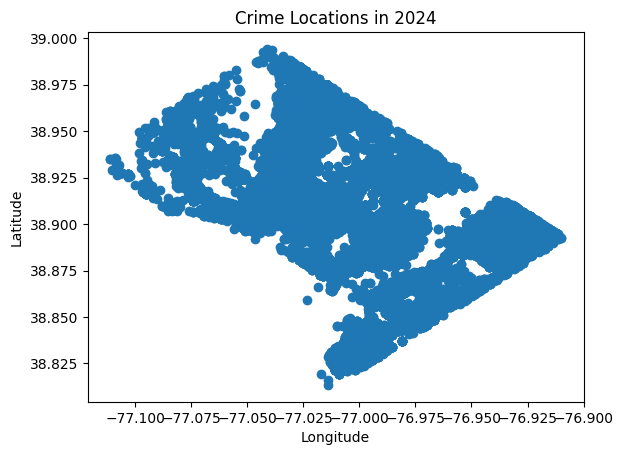

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df2_filtered['LONGITUDE'], df2_filtered['LATITUDE'])
plt.title("Crime Locations in 2024")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
df2_filtered

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,WARD,ANC,...,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,START_DATE,END_DATE,OBJECTID
0,399581.5100,129706.9200,5094764,2024/09/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,100 - 146 BLOCK OF WAYNE PLACE SE,8.0,8D,...,707.0,Cluster 39,009803 3,9803.0,Precinct 124,38.835154,-77.004820,2005-07-18 08:40:00+00:00,2024-09-30 13:30:00+00:00,629515303
1,403992.4500,135998.8200,24001130,2024/01/03 07:08:57+00,MIDNIGHT,OTHERS,THEFT/OTHER,100 - 222 BLOCK OF 35TH STREET NE,7.0,7F,...,603.0,Cluster 32,009603 3,9603.0,Precinct 102,38.891825,-76.953980,2024-01-03 03:10:00+00:00,2024-01-03 04:37:00+00:00,629765887
2,405841.8415,134205.6072,24002349,2024/01/05 18:59:05+00,DAY,OTHERS,MOTOR VEHICLE THEFT,4600 - 4699 BLOCK OF EASY PLACE SE,7.0,7E,...,604.0,Cluster 33,007707 2,7707.0,Precinct 106,38.875661,-76.932677,2024-01-05 16:13:00+00:00,2024-01-05 16:54:00+00:00,629765888
3,398491.1900,138718.1700,24002586,2024/01/06 01:07:04+00,EVENING,GUN,ROBBERY,1900 - 1925 BLOCK OF 4TH STREET NW,1.0,1B,...,306.0,Cluster 3,003400 1,3400.0,Precinct 20,38.916330,-77.017398,2024-01-05 23:49:00+00:00,2024-01-05 23:49:00+00:00,629765889
4,400121.3800,137998.9000,24002733,2024/01/06 06:59:30+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF 4TH STREET NE,5.0,5D,...,501.0,Cluster 23,008803 2,8803.0,Precinct 76,38.909852,-76.998601,2024-01-06 06:33:00+00:00,2024-01-06 07:00:00+00:00,629765890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26334,399978.8000,137790.8200,24031916,2024/03/01 20:26:50+00,EVENING,OTHERS,THEFT/OTHER,300 - 399 BLOCK OF MORSE STREET NE,5.0,5D,...,501.0,Cluster 23,008803 2,8803.0,Precinct 76,38.907977,-77.000244,2024-02-28 19:06:00+00:00,2024-02-28 20:08:00+00:00,630054026
26335,396378.9500,139491.3400,24047512,2024/03/30 10:35:26+00,MIDNIGHT,OTHERS,BURGLARY,1761 - 1780 BLOCK OF COLUMBIA ROAD NW,1.0,1C,...,303.0,Cluster 1,003901 2,3901.0,Precinct 35,38.923288,-77.041758,2024-03-30 09:07:00+00:00,2024-03-30 09:34:00+00:00,630054061
26336,402769.4500,139567.0500,24051570,2024/04/07 07:08:48+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2600 - 2699 BLOCK OF 28TH STREET NE,5.0,5C,...,503.0,Cluster 22,011100 1,11100.0,Precinct 71,38.923974,-76.968063,2024-04-07 00:56:00+00:00,2024-04-07 02:52:00+00:00,630054062
26337,400541.5000,139301.4000,24051785,2024/04/09 18:24:02+00,DAY,OTHERS,MOTOR VEHICLE THEFT,2300 - 2499 BLOCK OF WASHINGTON PLACE NE,5.0,5C,...,505.0,Cluster 22,009102 4,9102.0,Precinct 72,38.921585,-76.993756,2024-04-07 14:35:00+00:00,2024-04-07 16:14:00+00:00,630054063


In [ ]:
# Extract relevant features
coordinates = df[['LATITUDE', 'LONGITUDE']].dropna().values  # Replace with correct column names
crime_types = df['OFFENSE']  # Replace with your column name for offense type

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=6)
labels = agglomerative.fit_predict(coordinates)

silhouette = silhouette_score(coordinates, labels)
print(f"Silhouette score for Agglomerative Clustering: {silhouette}")



Silhouette score for Agglomerative Clustering: 0.3990445426098079


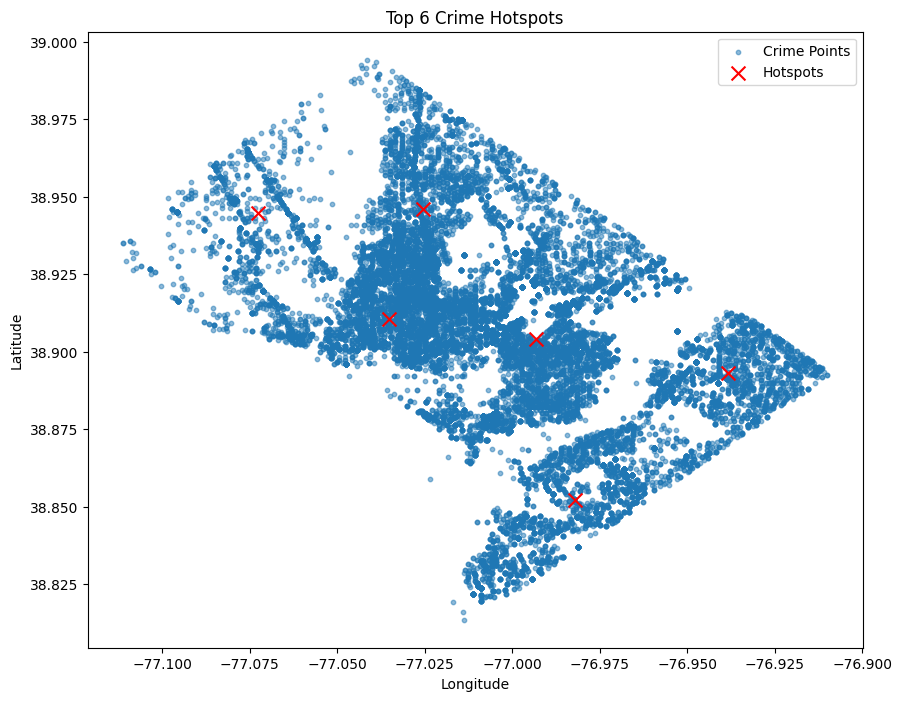

In [ ]:
# Calculate the centroid for each cluster
centroids = []
for i in range(6):
    cluster_points = coordinates[labels == i]
    centroid = np.mean(cluster_points, axis=0)  # Calculate mean of points in each cluster
    centroids.append(centroid)

centroids = np.array(centroids)

# Plot the crime points and centroids
plt.figure(figsize=(10, 8))
plt.scatter(coordinates[:, 1], coordinates[:, 0], s=10, alpha=0.5, label='Crime Points')
plt.scatter(centroids[:, 1], centroids[:, 0], s=100, c='red', label='Hotspots', marker='x')
plt.title("Top 6 Crime Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

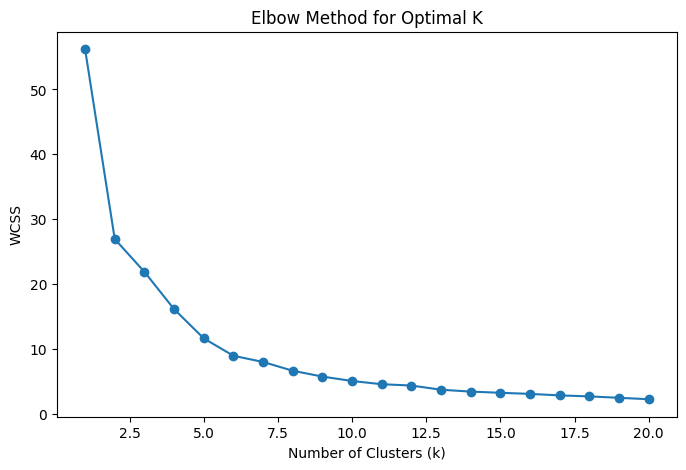

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Calculate WCSS for a range of cluster numbers
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

Using elbow method, we can say that 6 clusters can be used for k-means clustering.

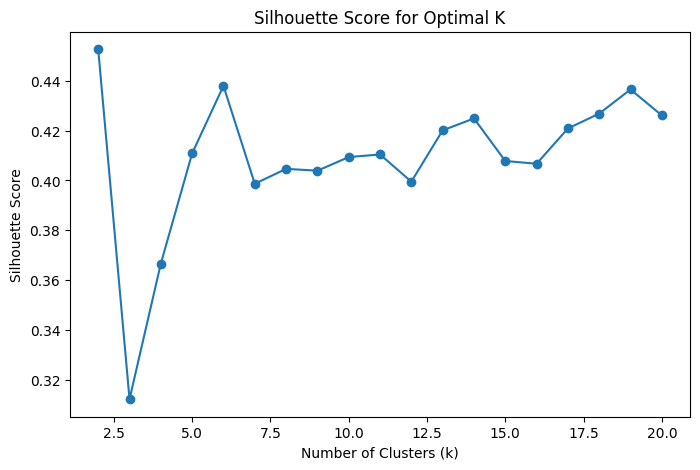

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

# Calculate Silhouette Scores for a range of cluster numbers
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(coordinates)
    sil_scores.append(silhouette_score(coordinates, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), sil_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

Again the silhoutte score is more optimal for around 6 clusters.

In [ ]:

kmeans = KMeans(n_clusters=6,init='k-means++', n_init=10, random_state=42)  # Find 7 clusters for hotspots
df2['cluster'] = kmeans.fit_predict(coordinates)

# Add cluster centers to the dataframe
df2['cluster_center_lat'] = kmeans.cluster_centers_[:, 0][df['cluster']]
df2['cluster_center_long'] = kmeans.cluster_centers_[:, 1][df['cluster']]

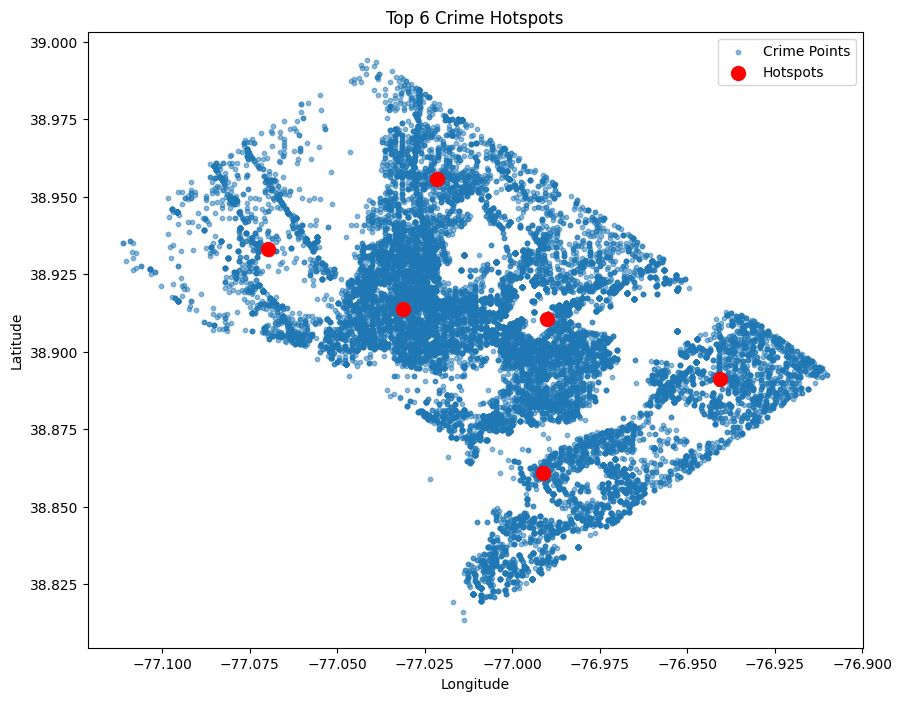

In [172]:
cluster_counts = df2['cluster'].value_counts()

# Get the top 7 clusters with the most crimes
top_clusters = cluster_counts.head(6).index
top_cluster_coords = kmeans.cluster_centers_[top_clusters]

# Plot the coordinates of these clusters
plt.figure(figsize=(10, 8))
plt.scatter(coordinates[:, 1], coordinates[:, 0], s=10, alpha=0.5, label='Crime Points')
plt.scatter(top_cluster_coords[:, 1], top_cluster_coords[:, 0], s=100, c='red', label='Hotspots')
plt.title("Top 6 Crime Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [174]:
# Calculate the Silhouette Score
sil_score = silhouette_score(coordinates, df2['cluster'])

print(f"Silhouette Score for the KMeans clustering with 6 clusters: {sil_score}")

Silhouette Score for the KMeans clustering with 6 clusters: 0.4386733560757238


In [ ]:
# Count the number of crimes in each cluster
cluster_counts = df2['cluster'].value_counts()

# Get the top 7 clusters with the most crimes
top_clusters = cluster_counts.head(6).index
top_cluster_coords = kmeans.cluster_centers_[top_clusters]

# Print the coordinates of the top 7 crime hotspots
print("Top 6 Crime Hotspot Coordinates:")
for i, (lat, long) in enumerate(top_cluster_coords):
    print(f"Hotspot {i + 1}: Latitude = {lat:.6f}, Longitude = {long:.6f}")

Top 6 Crime Hotspot Coordinates:
Hotspot 1: Latitude = 38.913608, Longitude = -77.031320
Hotspot 2: Latitude = 38.910403, Longitude = -76.990030
Hotspot 3: Latitude = 38.860789, Longitude = -76.991199
Hotspot 4: Latitude = 38.955590, Longitude = -77.021520
Hotspot 5: Latitude = 38.891175, Longitude = -76.940657
Hotspot 6: Latitude = 38.933282, Longitude = -77.069863


In [ ]:
from geopy.geocoders import Nominatim

# Initialize Nominatim Geocoder
geolocator = Nominatim(user_agent="crime_hotspots_mapper")

# List of top 6 coordinates
top_6_coords = [
    (38.913608, -77.031320),
    (38.910403, -76.990030),
    (38.860789, -76.991199),
    (38.955590, -77.021520),
    (38.891175, -76.940657),
    (38.933282, -77.069863),
]

# Map coordinates to area names
print("Top 6 Crime Hotspots with Area Names:")
for i, (lat, lon) in enumerate(top_6_coords, 1):
    try:
        location = geolocator.reverse((lat, lon), language='en')
        area_name = location.address
        print(f"Hotspot {i}: Latitude = {lat:.6f}, Longitude = {lon:.6f}, Area = {area_name}")
    except Exception as e:
        print(f"Hotspot {i}: Latitude = {lat:.6f}, Longitude = {lon:.6f}, Area = Could not retrieve (Error: {e})")

Top 6 Crime Hotspots with Area Names:
Hotspot 1: Latitude = 38.913608, Longitude = -77.031320, Area = 1339, Riggs Street Northwest, Logan Circle/Shaw, Ward 2, Washington, District of Columbia, 20009, United States
Hotspot 2: Latitude = 38.910403, Longitude = -76.990030, Area = Gallaudet University, Brentwood Parkway Northeast, Ivy City, Ward 5, Washington, District of Columbia, 20002, United States
Hotspot 3: Latitude = 38.860789, Longitude = -76.991199, Area = 1338, Talbert Terrace Southeast, Bridge District, Hillsdale, Ward 8, Washington, District of Columbia, 20020, United States
Hotspot 4: Latitude = 38.955590, Longitude = -77.021520, Area = 621, Jefferson Street Northwest, Brightwood Park, Ward 4, Washington, District of Columbia, 20011, United States
Hotspot 5: Latitude = 38.891175, Longitude = -76.940657, Area = 4262, East Capitol Street Northeast, Ward 7, Washington, District of Columbia, 20019, United States
Hotspot 6: Latitude = 38.933282, Longitude = -77.069863, Area = 3512,

To map the most frequent crime coordinates with the corresponding area in the District of Columbia (or any city), you would need a method to map these coordinates (latitude and longitude) to geographical areas such as neighborhoods or regions. This is typically done using reverse geocoding.

Steps:

Use reverse geocoding:

Reverse geocoding converts geographic coordinates (latitude and longitude) into a human-readable address, such as the neighborhood or area name.
Plot the coordinates with the area names: Once you have the areas, you can annotate the coordinates with the respective neighborhood names.
To implement this, you can use libraries such as:

Geopy:

A Python library that provides tools for geocoding and reverse geocoding.



In [ ]:
# Find unique responses
unique_responses1 = df2["SHIFT"].unique()
unique_responses2 = df2["OFFENSE"].unique()

# Print the unique responses
print(f"Unique responses in SHIFT: ")
print(unique_responses1)

print(f"Unique responses in OFFENSE:")
print(unique_responses2)

# Count of unique responses
num_unique1 = df2["SHIFT"].nunique()
print(f"\nNumber of unique responses: {num_unique1}")

num_unique2 = df2["OFFENSE"].nunique()
print(f"\nNumber of unique responses: {num_unique2}")



Unique responses in SHIFT: 
['MIDNIGHT' 'DAY' 'EVENING']
Unique responses in OFFENSE:
['HOMICIDE' 'THEFT/OTHER' 'MOTOR VEHICLE THEFT' 'ROBBERY' 'THEFT F/AUTO'
 'ASSAULT W/DANGEROUS WEAPON' 'SEX ABUSE' 'BURGLARY' 'ARSON']

Number of unique responses: 3

Number of unique responses: 9


Areas with the most frequent crime coordinates:
Offense: ARSON, Area: Downtown East
Offense: ASSAULT W/DANGEROUS WEAPON, Area: Lincoln Park
Offense: BURGLARY, Area: Near Northeast
Offense: HOMICIDE, Area: Lincoln Park
Offense: MOTOR VEHICLE THEFT, Area: Near Northeast
Offense: ROBBERY, Area: Near Northeast
Offense: SEX ABUSE, Area: Near Northeast
Offense: THEFT F/AUTO, Area: Bloomingdale
Offense: THEFT/OTHER, Area: Shaw


<ipython-input-175-8e2ca37cc0f8>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(offense_crime_locations))


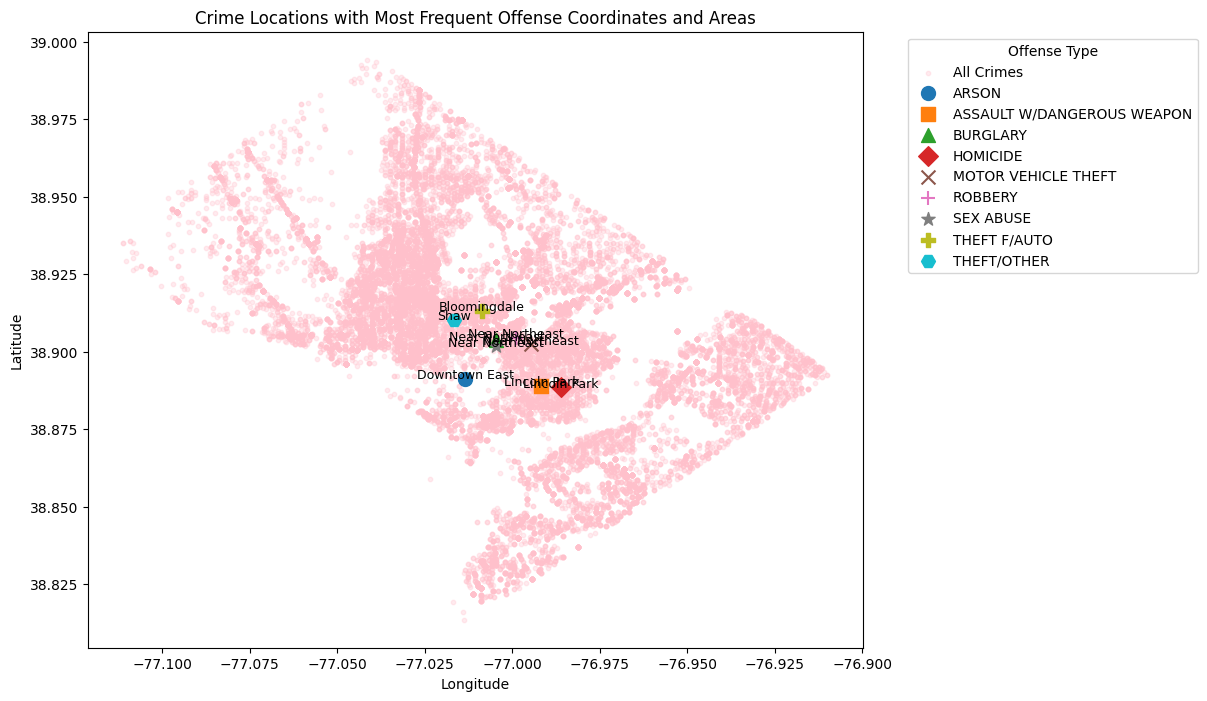

In [175]:
#Group by offense type and calculate the most frequent crime coordinates
offense_crime_locations = df2.groupby('OFFENSE').agg({
    'LATITUDE': 'mean',  # You can change this to 'max' or other methods based on how you want to define 'most'
    'LONGITUDE': 'mean'
}).reset_index()

# Initialize the geolocator
geolocator = Nominatim(user_agent="crime_map")

# Function to get detailed area or neighborhood from latitude and longitude
def get_area(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en')
        if location:
            # Extract detailed address components
            address = location.raw.get('address', {})
            suburb = address.get('suburb')  # Neighborhood or district
            neighbourhood = address.get('neighbourhood')  # Smaller local area
            city = address.get('city')  # Washington D.C. level
            return suburb or neighbourhood or city or 'Unknown'
    except Exception as e:
        print(f"Error with geocoding for ({lat}, {lon}): {e}")
        return "Unknown"

# Add area/region information to the offense crime locations
offense_crime_locations['area'] = offense_crime_locations.apply(
    lambda row: get_area(row['LATITUDE'], row['LONGITUDE']), axis=1)

# Print the areas for each offense type
print("Areas with the most frequent crime coordinates:")
for i, row in offense_crime_locations.iterrows():
    print(f"Offense: {row['OFFENSE']}, Area: {row['area']}")

# Create the plot
plt.figure(figsize=(10, 8))

# Plot all crime locations
plt.scatter(df2['LONGITUDE'], df2['LATITUDE'], c='pink', alpha=0.3, s=10, label='All Crimes')

# Define a list of markers and colors for each offense type
markers = ['o', 's', '^', 'D', 'x', '+', '*', 'P', 'H']
colors = plt.cm.get_cmap("tab10", len(offense_crime_locations))

# Plot the most frequent crime coordinates for each offense type with area labels
for i, row in offense_crime_locations.iterrows():
    plt.scatter(row['LONGITUDE'], row['LATITUDE'], color=colors(i), marker=markers[i % len(markers)],
                s=100, label=row['OFFENSE'])

    # Annotate the plot with the area name
    plt.text(row['LONGITUDE'] + 0.0001, row['LATITUDE'] + 0.0001, row['area'], fontsize=9, ha='center')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Locations with Most Frequent Offense Coordinates and Areas')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [176]:
top_cluster_offenses = {}

for cluster in top_clusters:
    # Get all offenses for this cluster
    offenses_in_cluster = df2[df2['cluster'] == cluster]['OFFENSE']

    # Find the most common offense
    most_common_offense = Counter(offenses_in_cluster).most_common(1)[0]
    top_cluster_offenses[cluster] = most_common_offense

# Print the most common offenses in each hotspot
for cluster, (offense, count) in top_cluster_offenses.items():
    print(f"Cluster {cluster}: Most common offense is '{offense}' with {count} occurrences.")

Cluster 5: Most common offense is 'THEFT/OTHER' with 4740 occurrences.
Cluster 0: Most common offense is 'THEFT/OTHER' with 2076 occurrences.
Cluster 3: Most common offense is 'THEFT/OTHER' with 1551 occurrences.
Cluster 4: Most common offense is 'THEFT/OTHER' with 1184 occurrences.
Cluster 1: Most common offense is 'THEFT/OTHER' with 815 occurrences.
Cluster 2: Most common offense is 'THEFT/OTHER' with 1342 occurrences.


For Feature "SHIFT":

In [ ]:
# Count crimes per shift and find the shift with the most crimes
shift_counts = df2['SHIFT'].value_counts()

# Print the shift with the most crimes
most_crimes_shift = shift_counts.idxmax()
print(f"\nThe shift with the most crimes is: {most_crimes_shift} with {shift_counts.max()} occurrences.")


The shift with the most crimes is: EVENING with 10627 occurrences.


In [ ]:
# Group by shift and offense type to find the most common offense in each shift
shift_offense_counts = df2.groupby(['SHIFT', 'OFFENSE']).size().reset_index(name='count')

# Find the most common offense in each shift
shift_most_common_offense = shift_offense_counts.loc[shift_offense_counts.groupby('SHIFT')['count'].idxmax()]

# Print the most common crime in each shift
print("\nMost common offense in each shift:")
for _, row in shift_most_common_offense.iterrows():
    print(f"Shift: {row['SHIFT']}, Most common offense: {row['OFFENSE']} with {row['count']} occurrences")


Most common offense in each shift:
Shift: DAY, Most common offense: THEFT/OTHER with 4675 occurrences
Shift: EVENING, Most common offense: THEFT/OTHER with 5398 occurrences
Shift: MIDNIGHT, Most common offense: THEFT/OTHER with 1635 occurrences


For feature "METHOD"

In [ ]:

# Step 1: Identify the most common method
method_counts = df2['METHOD'].value_counts()
most_common_method = method_counts.idxmax()
print("Most common method of crime:")
print(f"Method: {most_common_method}, Count: {method_counts[most_common_method]}")

# Step 2: Filter crimes committed via "GUN"
gun_crimes = df2[df2['METHOD'] == 'GUN']

# Find the coordinates where gun crimes occur most frequently
gun_crime_hotspots = gun_crimes.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='count')

# Identify the top hotspot (coordinates with the most gun crimes)
top_gun_crime_hotspot = gun_crime_hotspots.loc[gun_crime_hotspots['count'].idxmax()]
print("\nTop coordinates witnessing the most crimes via GUN:")
print(f"Latitude: {top_gun_crime_hotspot['LATITUDE']}, Longitude: {top_gun_crime_hotspot['LONGITUDE']}, Count: {top_gun_crime_hotspot['count']}")

# Optional: Display the top N gun crime hotspots
top_n_gun_hotspots = gun_crime_hotspots.sort_values(by='count', ascending=False).head(10)
print("\nTop 10 coordinates for gun crimes:")
print(top_n_gun_hotspots)


Most common method of crime:
Method: OTHERS, Count: 23989

Top coordinates witnessing the most crimes via GUN:
Latitude: 38.8966558827, Longitude: -76.9476475094, Count: 14.0

Top 10 coordinates for gun crimes:
      LATITUDE  LONGITUDE  count
623  38.896656 -76.947648     14
680  38.899976 -76.982460      8
185  38.854172 -76.988424      8
189  38.855203 -76.989731      8
2    38.821626 -77.011081      7
845  38.906662 -76.952819      6
330  38.874120 -76.972067      6
155  38.848137 -76.976139      6
210  38.858465 -76.990056      6
6    38.823601 -77.008890      6


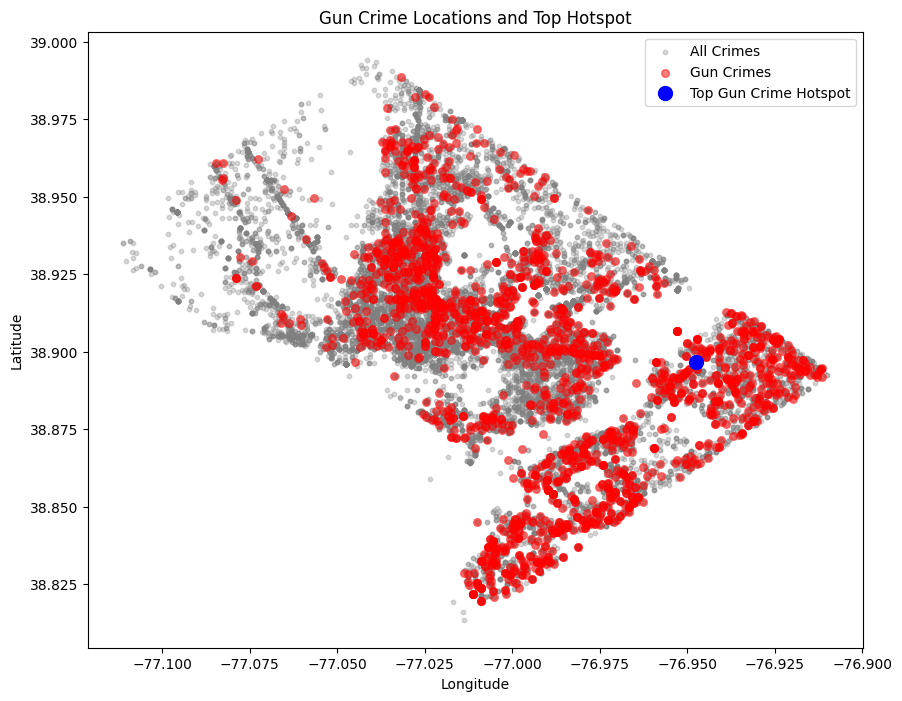

In [ ]:
# Plot all crime locations
plt.figure(figsize=(10, 8))
plt.scatter(df2['LONGITUDE'], df2['LATITUDE'], c='gray', alpha=0.3, s=10, label='All Crimes')

# Highlight gun crime locations
plt.scatter(gun_crimes['LONGITUDE'], gun_crimes['LATITUDE'], c='red', alpha=0.5, s=30, label='Gun Crimes')

# Highlight the top hotspot
plt.scatter(top_gun_crime_hotspot['LONGITUDE'], top_gun_crime_hotspot['LATITUDE'], c='blue', s=100, label='Top Gun Crime Hotspot')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gun Crime Locations and Top Hotspot')
plt.legend()
plt.show()

In [ ]:
from geopy.geocoders import Nominatim

# Initialize the geolocator
geolocator = Nominatim(user_agent="gun_crime_hotspot_locator")

# Function to get detailed area or neighborhood from latitude and longitude
def get_area(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en')
        if location:
            # Extract detailed address components
            address = location.raw.get('address', {})
            suburb = address.get('suburb')  # Neighborhood or district
            neighbourhood = address.get('neighbourhood')  # Smaller local area
            city = address.get('city')  # Washington D.C. level
            return suburb or neighbourhood or city or 'Unknown'
    except Exception as e:
        print(f"Error with geocoding for ({lat}, {lon}): {e}")
        return "Unknown"

# Get the area corresponding to the top hotspot
top_gun_crime_hotspot_lat = top_gun_crime_hotspot['LATITUDE']
top_gun_crime_hotspot_lon = top_gun_crime_hotspot['LONGITUDE']

# Find detailed area for the top gun crime hotspot
top_gun_crime_area = get_area(top_gun_crime_hotspot_lat, top_gun_crime_hotspot_lon)

# Print the result
print("\nTop Gun Crime Hotspot Area:")
print(f"Latitude: {top_gun_crime_hotspot_lat}, Longitude: {top_gun_crime_hotspot_lon}, Area: {top_gun_crime_area}")

# Optional: Find areas for top 10 gun crime hotspots
print("\nTop 10 Gun Crime Hotspot Areas:")
top_n_gun_hotspots['area'] = top_n_gun_hotspots.apply(
    lambda row: get_area(row['LATITUDE'], row['LONGITUDE']), axis=1)
print(top_n_gun_hotspots[['LATITUDE', 'LONGITUDE', 'count', 'area']])




Top Gun Crime Hotspot Area:
Latitude: 38.8966558827, Longitude: -76.9476475094, Area: Central Northeast

Top 10 Gun Crime Hotspot Areas:
      LATITUDE  LONGITUDE  count               area
623  38.896656 -76.947648     14  Central Northeast
680  38.899976 -76.982460      8             Carver
185  38.854172 -76.988424      8          Hillsdale
189  38.855203 -76.989731      8          Hillsdale
2    38.821626 -77.011081      7         Washington
845  38.906662 -76.952819      6            Mayfair
330  38.874120 -76.972067      6         Washington
155  38.848137 -76.976139      6         Washington
210  38.858465 -76.990056      6    Bridge District
6    38.823601 -77.008890      6           Bellevue
